# PROJECT 5: HOUSES PRICES PREDICTION IN BCN EXPLORATORY DATA ANALYSIS

In [2]:
import pandas as pd
import numpy as np

%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

import seaborn as sns

#import statsmodels.api as sm

In [3]:
df_prop = pd.read_csv(r'C:\Users\Migue Granica\Desktop\IronHack\Module_3\PROJECT_5\csv\prop_prices_2.csv')
df_val  = pd.read_excel(r'C:\Users\Migue Granica\Desktop\IronHack\Module_3\PROJECT_5\xls\m2_x_año_3.xlsx')

In [4]:
df_val.distrito = df_val.distrito.apply(lambda x: x.strip(),)

In [5]:
df_val.columns

Index(['distrito', 'valor_m2', 'año'], dtype='object')

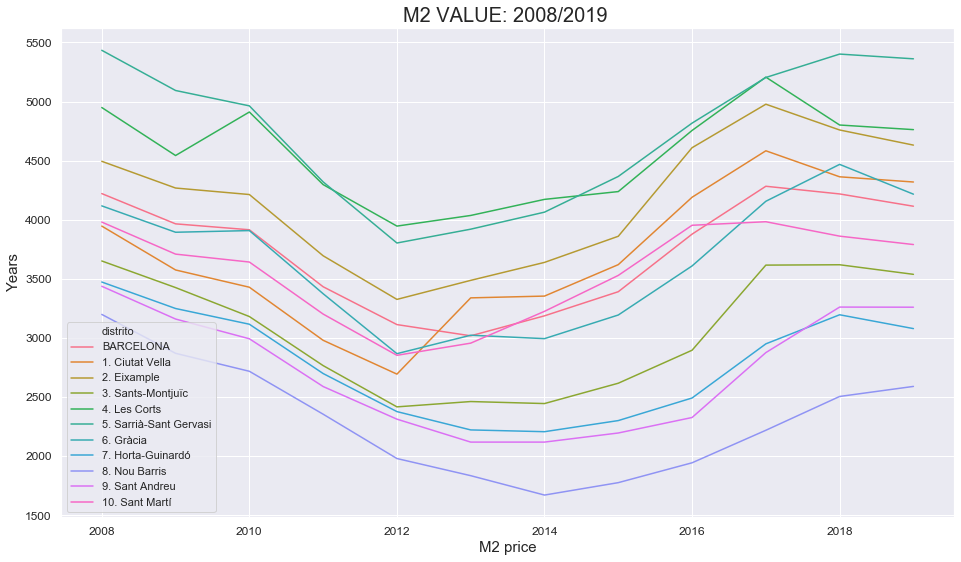

In [6]:
sns.set(style="darkgrid")
ax = plt.figure(figsize=(16,9))
ax = sns.lineplot(x='año', y='valor_m2', hue='distrito', data=df_val)

ax.set_title("M2 VALUE: 2008/2019 ",fontsize=20)
ax.set_xlabel("M2 price",fontsize=15)
ax.set_ylabel("Years",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('m2 value.png', dpi=400)

In [53]:
df_prop.head()

Unnamed: 0             district  room_n  bath_n  sqm_constr      price
0           0  Sarria-Sant_Gervasi     5.0     3.0       210.0  1390000.0
1           1  Sarria-Sant_Gervasi     4.0     2.0       185.0  1350000.0
2           2             Eixample     2.0     2.0        86.0   645000.0
3           3             Eixample     3.0     1.0        70.0   399000.0
4           4             Eixample     4.0     2.0       100.0   398000.0

In [54]:
df_prop.isna().sum()

Unnamed: 0    0
district      0
room_n        0
bath_n        0
sqm_constr    0
price         0
dtype: int64

In [55]:
df_prop.district.value_counts()

Eixample               3697
Sant Marti             2132
Ciutat Vella           2126
Sarria-Sant_Gervasi    1759
Gràcia                 1060
Sants Montjuic         1049
Horta Guinardó         1017
Nou Barris              870
Sant Andreu             797
Les Corts               792
Name: district, dtype: int64

In [56]:
df_prop.describe()

Unnamed: 0        room_n        bath_n    sqm_constr         price
count  15299.000000  15299.000000  15299.000000  15299.000000  1.529900e+04
mean    8305.918426      2.974770      2.057651    109.905353  5.450756e+05
std     4885.920917      1.213034     14.750293     78.621842  5.697092e+05
min        0.000000      1.000000      1.000000     15.000000  3.900000e+04
25%     4108.500000      2.000000      1.000000     70.000000  2.500000e+05
50%     8198.000000      3.000000      2.000000     89.000000  3.850000e+05
75%    12303.000000      4.000000      2.000000    120.000000  6.000000e+05
max    17182.000000     25.000000    993.000000    996.000000  1.150000e+07

In [57]:
df_prop = df_prop.loc[df_prop.sqm_constr>10]
df_prop

Unnamed: 0             district  room_n  bath_n  sqm_constr      price
0               0  Sarria-Sant_Gervasi     5.0     3.0       210.0  1390000.0
1               1  Sarria-Sant_Gervasi     4.0     2.0       185.0  1350000.0
2               2             Eixample     2.0     2.0        86.0   645000.0
3               3             Eixample     3.0     1.0        70.0   399000.0
4               4             Eixample     4.0     2.0       100.0   398000.0
...           ...                  ...     ...     ...         ...        ...
15299       17178       Horta Guinardó     4.0     2.0       115.0   295000.0
15300       17179       Horta Guinardó     3.0     1.0        55.0   170000.0
15301       17180           Sant Marti     3.0     1.0        87.0   350000.0
15302       17181  Sarria-Sant_Gervasi     6.0     5.0       930.0  3900000.0
15303       17182       Horta Guinardó     2.0     1.0       200.0   490000.0

[15299 rows x 6 columns]

In [58]:
df_prop.sort_values(by='bath_n',ascending=False)

Unnamed: 0        district  room_n  bath_n  sqm_constr     price
10952       11733  Horta Guinardó     1.0   993.0       140.0  139000.0
11400       12221      Nou Barris     1.0   828.0        64.0   53000.0
12979       13958  Horta Guinardó     1.0   767.0        90.0   69000.0
13896       15639      Nou Barris     1.0   750.0        60.0   45000.0
10265       10998     Sant Andreu     2.0   711.0       121.0   86000.0
...           ...             ...     ...     ...         ...       ...
7068         7575        Eixample     4.0     1.0       107.0  472000.0
7070         7577        Eixample     3.0     1.0        66.0  325000.0
7071         7578          Gràcia     3.0     1.0        85.0  325000.0
7075         7582      Nou Barris     3.0     1.0        43.0  145000.0
15303       17182  Horta Guinardó     2.0     1.0       200.0  490000.0

[15299 rows x 6 columns]

In [59]:
df_prop['sqm_price']=round(df_prop.price/df_prop.sqm_constr,2)

In [60]:
df_prop_2 = df_prop.loc[df_prop['bath_n']<3*df_prop.room_n]

In [61]:
df_prop_3 = df_prop_2.loc[df_prop_2['room_n']<4*df_prop_2.bath_n]

In [10]:
#df_prop.loc[df_prop['sqm_constr']==1.248, 'sqm_constr']=1248
#df_prop.loc[df_prop['sqm_constr']==1.244, 'sqm_constr']=1244
#df_prop.loc[df_prop['sqm_constr']==1.170, 'sqm_constr']=1170
#df_prop.loc[df_prop['bath_n']==520, 'bath_n']=5
#df_prop['sqm_price']=round(df_prop.price/df_prop.sqm_constr,2)
#df_prop.to_csv('house_prices.csv')

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000012370DAC730>,
      dtype=object)

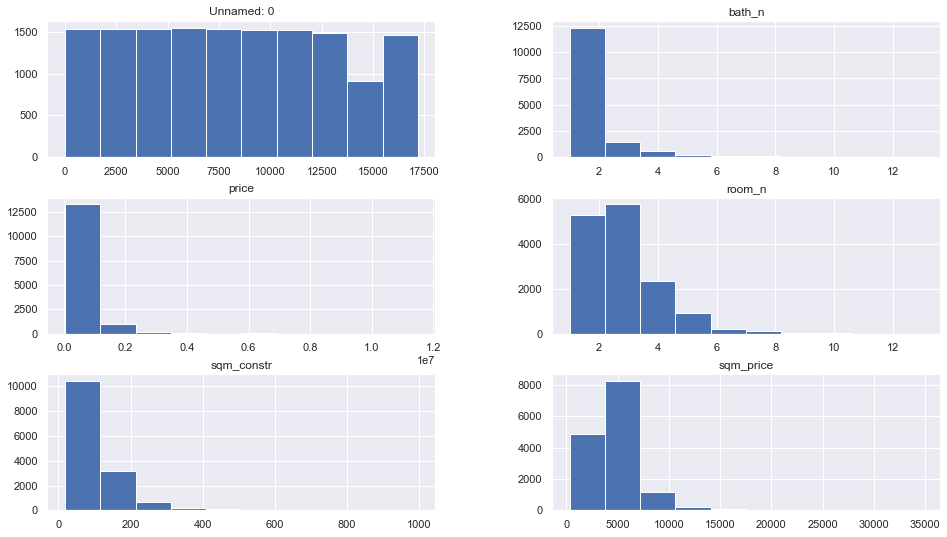

In [62]:
df_prop_3.hist(figsize=(16,9))
#ax.figure.savefig('m2 value.png', dpi=400)

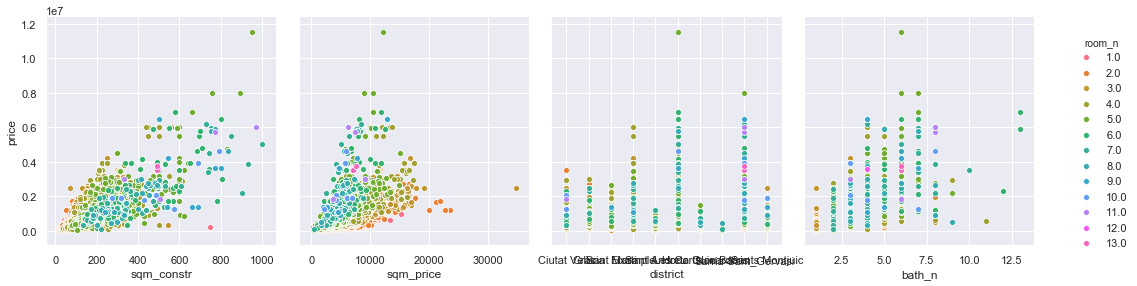

In [63]:
g = sns.pairplot(df_prop_3, x_vars=["sqm_constr", "sqm_price", "district", "bath_n"],  y_vars=["price"],hue = "room_n")
g.fig.set_size_inches(16,4)
#g.set_title("Houses by nº of rooms ",fontsize=20)
g.fig.savefig('n_room_houses_2.png', dpi=400)

c:\program files\python38\lib\site-packages\seaborn\axisgrid.py:2079: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


RuntimeError: Selected KDE bandwidth is 0. Cannot estimate density.

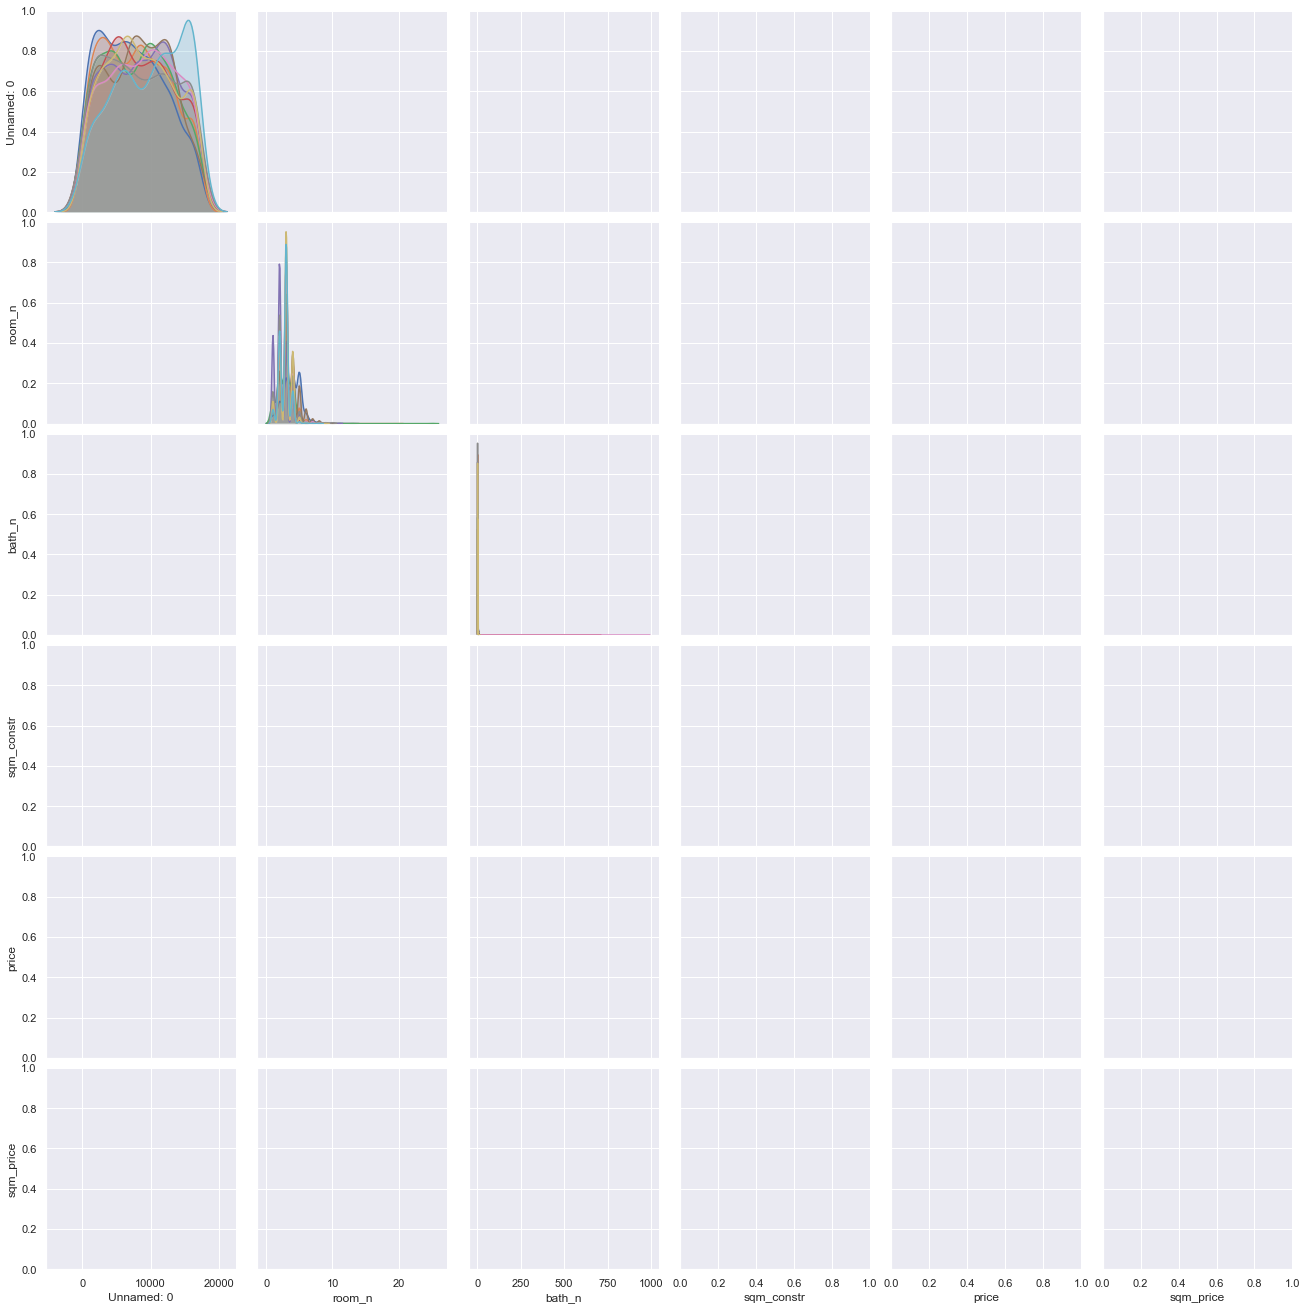

In [64]:
sns.pairplot(df_prop, hue = "district", size=3)


# 1.LISTINGS NUMBER 

## 1.1LISTINGS NUMBER BY DISTRICT

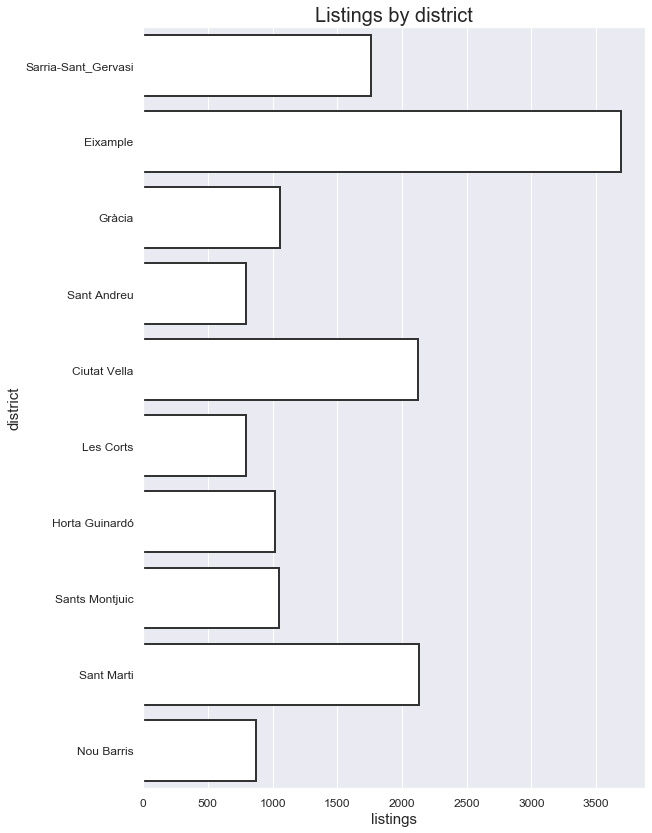

In [65]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(9,14))
ax = sns.countplot(y="district",linewidth=2,color='white', edgecolor=".2", data=df_prop)

ax.axes.set_title("Listings by district",fontsize=20)
ax.set_xlabel("listings",fontsize=15)
ax.set_ylabel("district",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('number_of_listings.png', dpi=400)



ax = sns.FacetGrid(df_prop, row="district", col="room_n", margin_titles=True)
bins = np.linspace(0, 60, 13)
ax.map(plt.hist, "price", color="steelblue", bins=bins)

## 1.2 Outliers remove: IQR Score

In [66]:
import numpy as np
import scipy.stats


In [ ]:
df_prop_3.loc

In [126]:
districtes =['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts','Sant Marti',
             'Ciutat Vella','Sants Montjuic','Horta Guinardó', 'Sant Andreu', 'Nou Barris']
def remove_outlier_price(df_in, cat_col_name):
    
    for i in districtes:
        distr_val = df_in.loc[df_in[cat_col_name]==i]['price']
        q1 = distr_val.quantile(0.05)
        q3 = distr_val.quantile(0.95)
        iqr = q3-q1 #Interquartile range
        #fence_low  = q1-1.5*iqr
        #fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in['price'] > q1-1.5*iqr) & (df_in['price'] < q3+1.5*iqr)]
        
    return df_out

In [127]:
districtes =['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts','Sant Marti',
             'Ciutat Vella','Sants Montjuic','Horta Guinardó', 'Sant Andreu', 'Nou Barris']
def remove_outlier_sqm_price(df_in, cat_col_name):
    
    for i in districtes:
        distr_val = df_in.loc[df_in[cat_col_name]==i]['sqm_price']
        q1 = distr_val.quantile(0.05)
        q3 = distr_val.quantile(0.95)
        iqr = q3-q1 #Interquartile range
        #fence_low  = q1-1.5*iqr
        #fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in['sqm_price'] > q1-1.5*iqr) & (df_in['sqm_price'] < q3+1.5*iqr)]
        
    return df_out

In [168]:
districtes =['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts','Sant Marti',
             'Ciutat Vella','Sants Montjuic','Horta Guinardó', 'Sant Andreu', 'Nou Barris']
def remove_outlier_surface(df_in, cat_col_name):
    
    for i in districtes:
        distr_val = df_in.loc[df_in[cat_col_name]==i]['sqm_constr']
        q1 = distr_val.quantile(0.05)
        q3 = distr_val.quantile(0.95)
        iqr = q3-q1 #Interquartile range
        #fence_low  = q1-1.5*iqr
        #fence_high = q3+1.5*iqr
        df_out = df_in.loc[(df_in['sqm_constr'] > q1-1.5*iqr) & (df_in['sqm_constr'] < q3+1.5*iqr)]
        
    return df_out

In [169]:
df_prop_4 = remove_outlier_price(df_prop_3, 'district')
df_prop_5 = remove_outlier_sqm_price(df_prop_4, 'district')
df_prop_clean = remove_outlier_surface(df_prop_5, 'district')
df_prop_3.district.value_counts(), df_prop_4.district.value_counts(), df_prop_4.district.value_counts(), df_prop_clean.district.value_counts()

(Eixample               3540
 Ciutat Vella           2026
 Sant Marti             1980
 Sarria-Sant_Gervasi    1729
 Gràcia                 1025
 Sants Montjuic          978
 Horta Guinardó          971
 Nou Barris              829
 Les Corts               771
 Sant Andreu             760
 Name: district, dtype: int64,
 Eixample               3355
 Ciutat Vella           1991
 Sant Marti             1940
 Sarria-Sant_Gervasi    1471
 Gràcia                 1010
 Sants Montjuic          974
 Horta Guinardó          971
 Nou Barris              829
 Sant Andreu             760
 Les Corts               658
 Name: district, dtype: int64,
 Eixample               3355
 Ciutat Vella           1991
 Sant Marti             1940
 Sarria-Sant_Gervasi    1471
 Gràcia                 1010
 Sants Montjuic          974
 Horta Guinardó          971
 Nou Barris              829
 Sant Andreu             760
 Les Corts               658
 Name: district, dtype: int64,
 Eixample               3199
 Ciutat 

In [206]:
df_prop_clean.to_csv('prop_clean.csv')

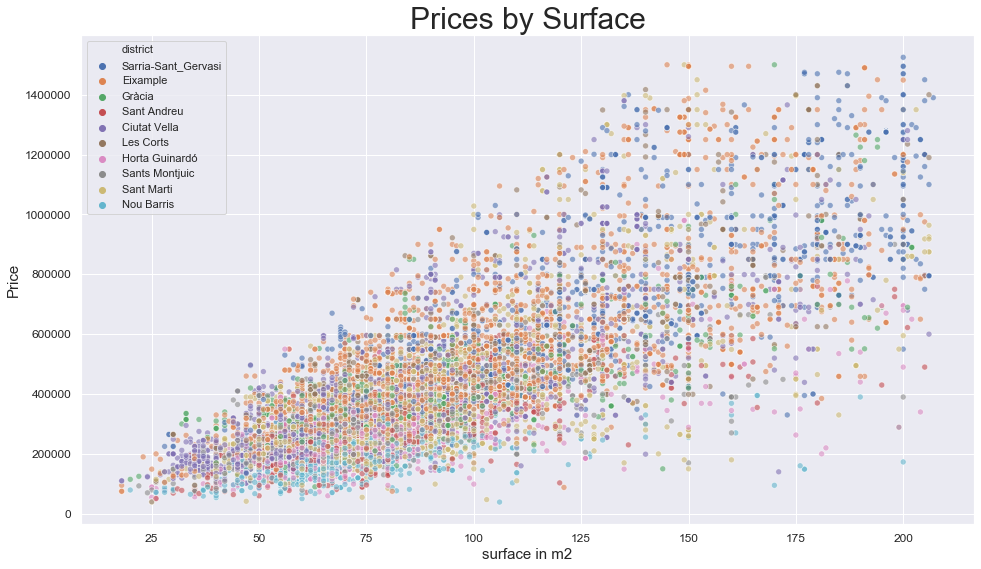

In [170]:
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.scatterplot(df_prop_3.sqm_constr, df_prop_3.price,hue='district', alpha=0.6, data=df_prop_clean)

ax.axes.set_title("Prices by Surface",fontsize=30)
ax.set_xlabel("surface in m2",fontsize=15)
ax.set_ylabel("Price",fontsize=15)
ax.tick_params(labelsize=12)
#ax.figure.savefig('Prices_by_surface.png', dpi=400)

In [73]:
def plot_scatter_chart(df, location):
    rooms_2 = df[(df.district==location) & (df.room_n==2)]
    rooms_3 = df[(df.district==location) & (df.room_n==3)]
    
    fig, ax = plt.subplots(figsize=(16,9))
    ax = sns.scatterplot(rooms_2.sqm_constr, rooms_2.price, alpha=0.7, data=rooms_2, legend ='full')
    ax = sns.scatterplot(rooms_3.sqm_constr, rooms_3.price, marker='+', alpha=0.7, data=rooms_3, legend ='full')
    
    ax.axes.set_title(f"SQM Prices by Surface in {i}",fontsize=30)
    ax.set_xlabel("surface",fontsize=15)
    ax.set_ylabel("SQM Price",fontsize=15)
    ax.tick_params(labelsize=12)
    ax.figure.savefig(f"SQM Prices by Surface and rooms in {i}", dpi=400)

In [171]:
def plot_scatter_chart(df_1, df_2, location):
    rooms_1_2 = df_1[(df_1.district==location) & (df_1.room_n==2)]
    rooms_1_3 = df_1[(df_1.district==location) & (df_1.room_n==3)]
    
    rooms_2_2 = df_2[(df_1.district==location) & (df_2.room_n==2)]
    rooms_2_3 = df_2[(df_1.district==location) & (df_2.room_n==3)]
    
    fig, (ax1, ax2) = plt.subplots(1,2,figsize=(16,9))
    sns.scatterplot(rooms_1_2.sqm_constr, rooms_1_2.price, alpha=0.7, data=rooms_1_2, legend ='full', ax=ax1)
    sns.scatterplot(rooms_1_3.sqm_constr, rooms_1_3.price, marker='+', alpha=0.7, data=rooms_1_3, legend ='full', ax=ax1)
    
    ax1.axes.set_title(f"SQM Prices by Surface in {i}",fontsize=20)
    ax1.set_xlabel("surface",fontsize=15)
    ax1.set_ylabel("Price",fontsize=15)
    ax1.tick_params(labelsize=12)
    
    sns.scatterplot(rooms_2_2.sqm_constr, rooms_2_2.price, alpha=0.7, data=rooms_2_2, legend ='full', ax=ax2)
    sns.scatterplot(rooms_2_3.sqm_constr, rooms_2_3.price, marker='+', alpha=0.7, data=rooms_2_3, legend ='full',ax=ax2)
    
    ax2.axes.set_title(f"SQM Prices by Surface in {i}",fontsize=20)
    ax2.set_xlabel("surface",fontsize=15)
    ax2.set_ylabel("Price",fontsize=15)
    ax2.tick_params(labelsize=12)
    #ax1.figure.savefig(f"SQM Prices by Surface and rooms in {i}", dpi=400)

<ipython-input-171-b9e8b455c79b>:5: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rooms_2_2 = df_2[(df_1.district==location) & (df_2.room_n==2)]
<ipython-input-171-b9e8b455c79b>:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  rooms_2_3 = df_2[(df_1.district==location) & (df_2.room_n==3)]


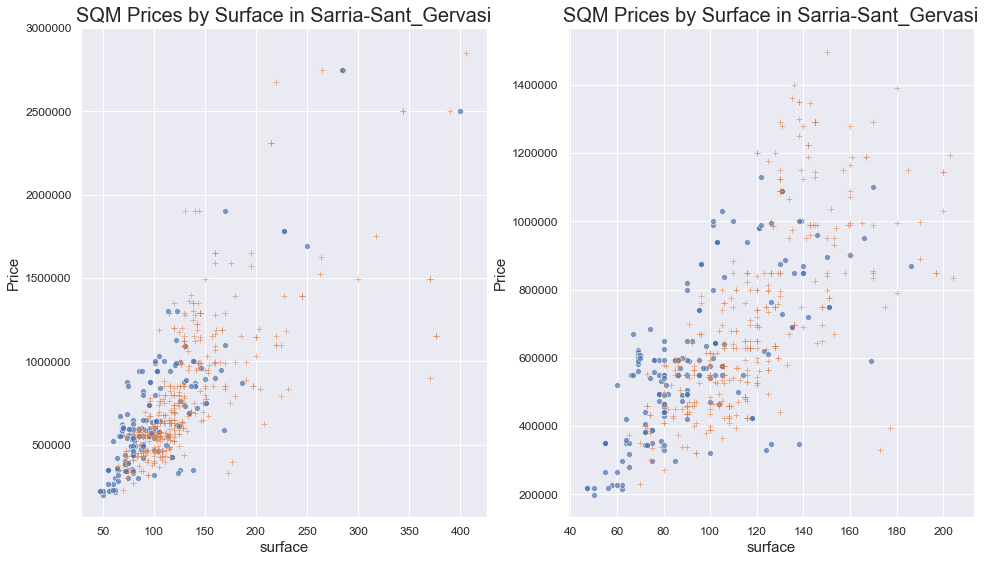

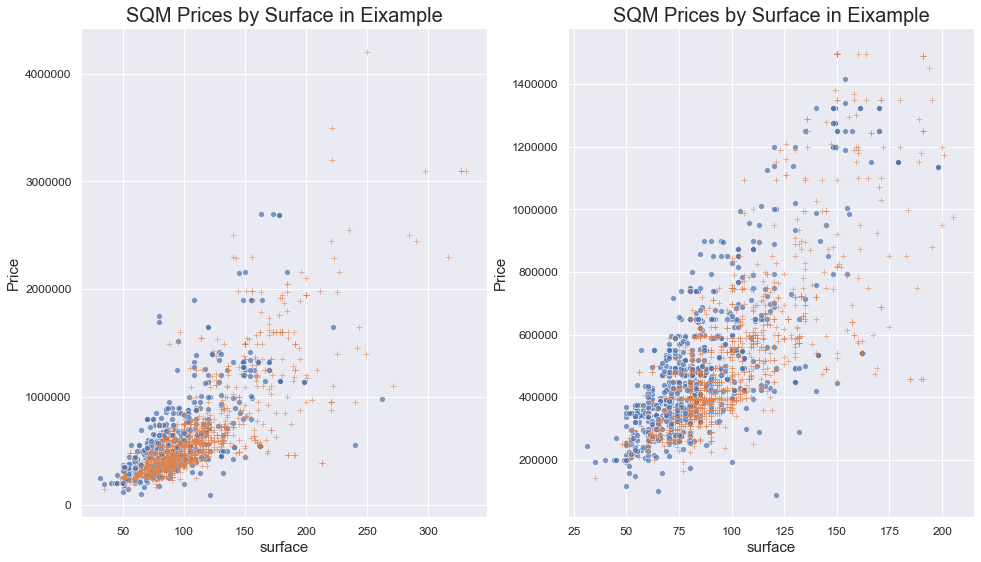

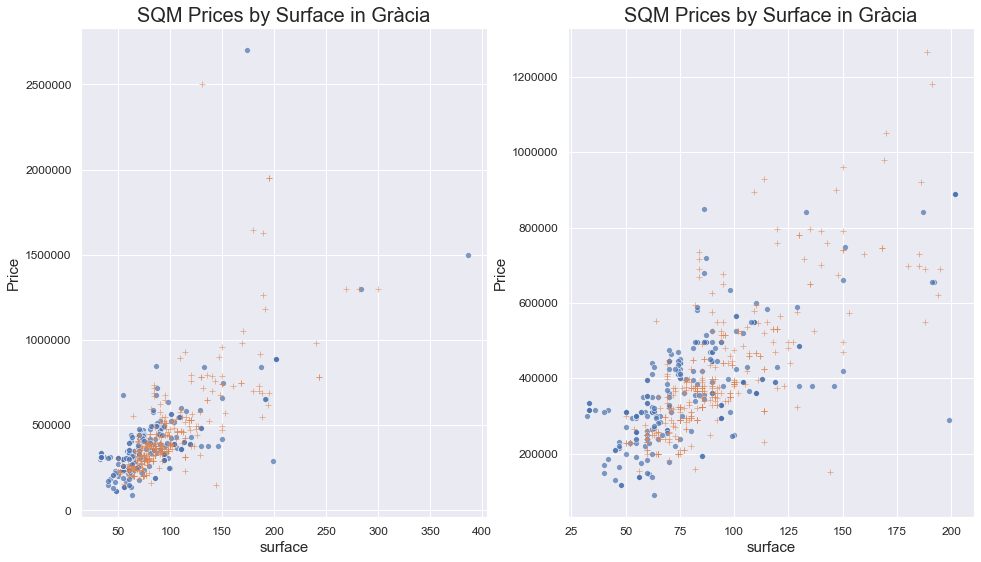

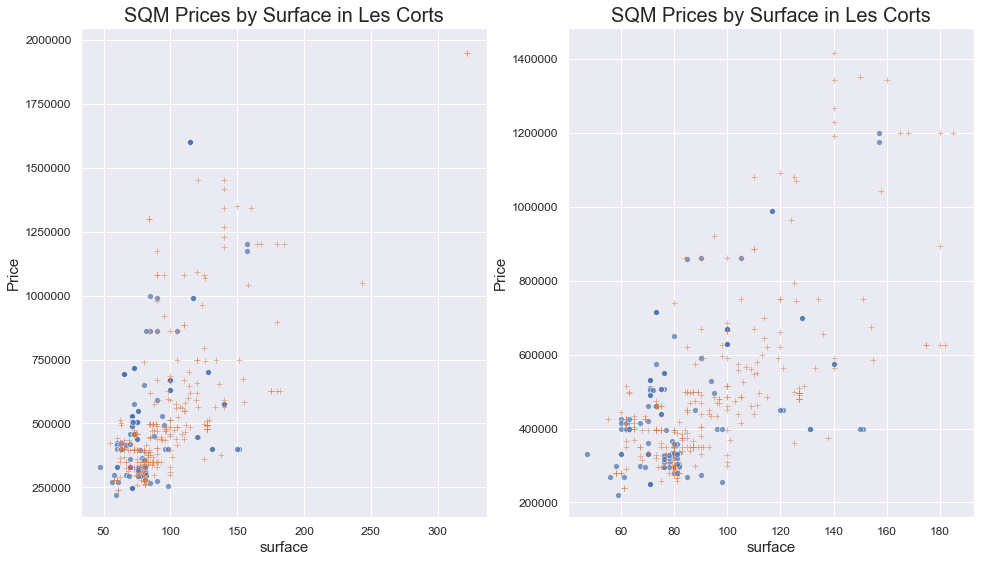

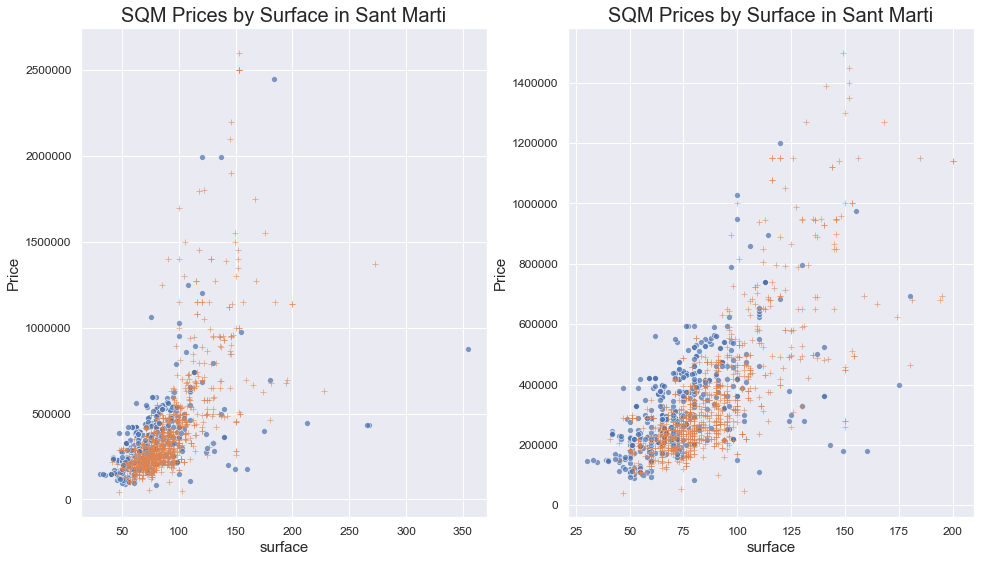

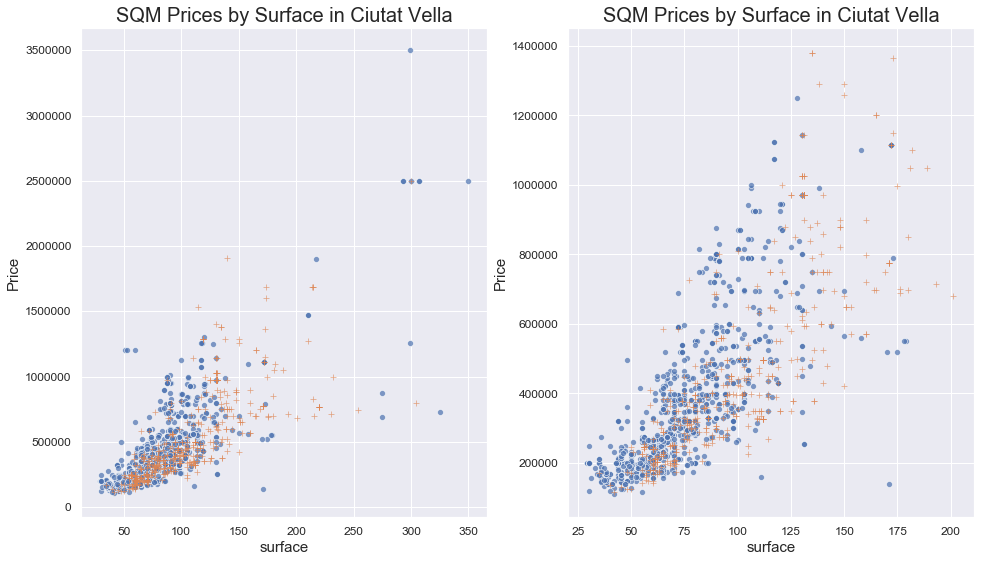

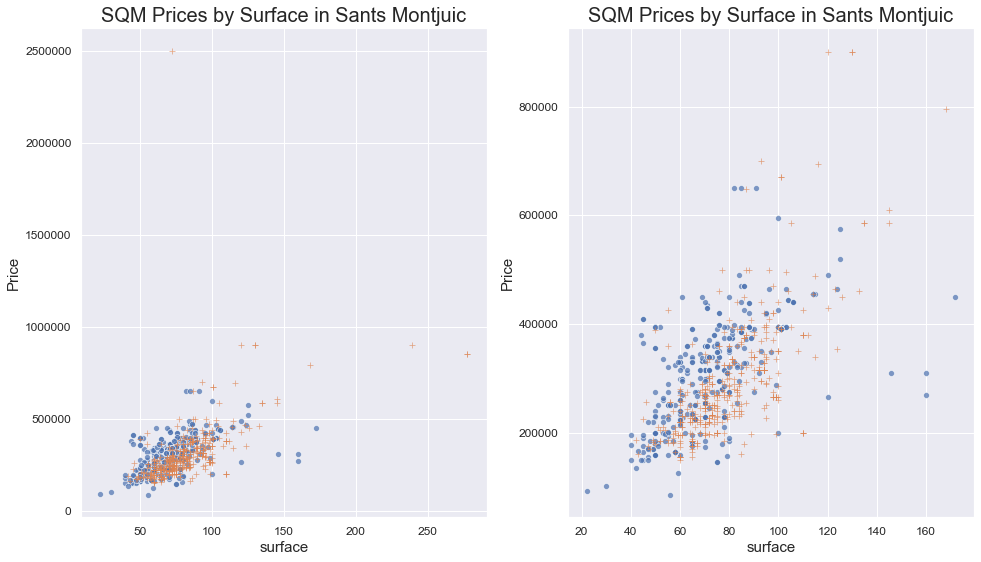

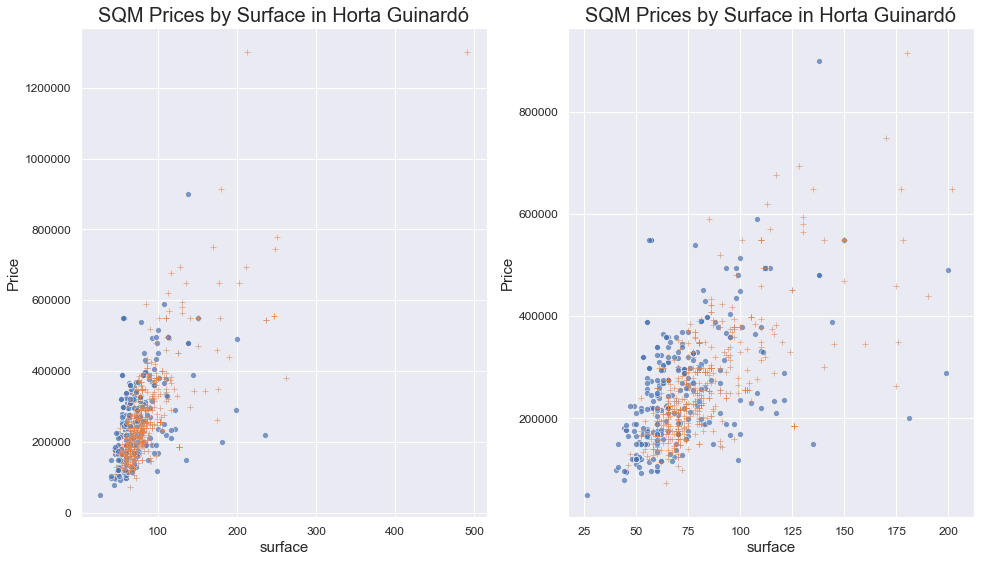

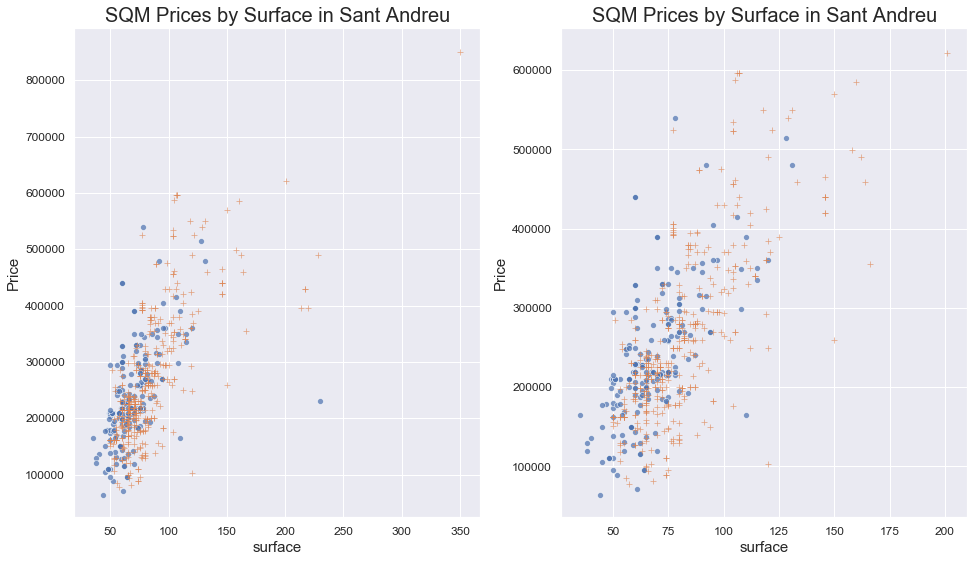

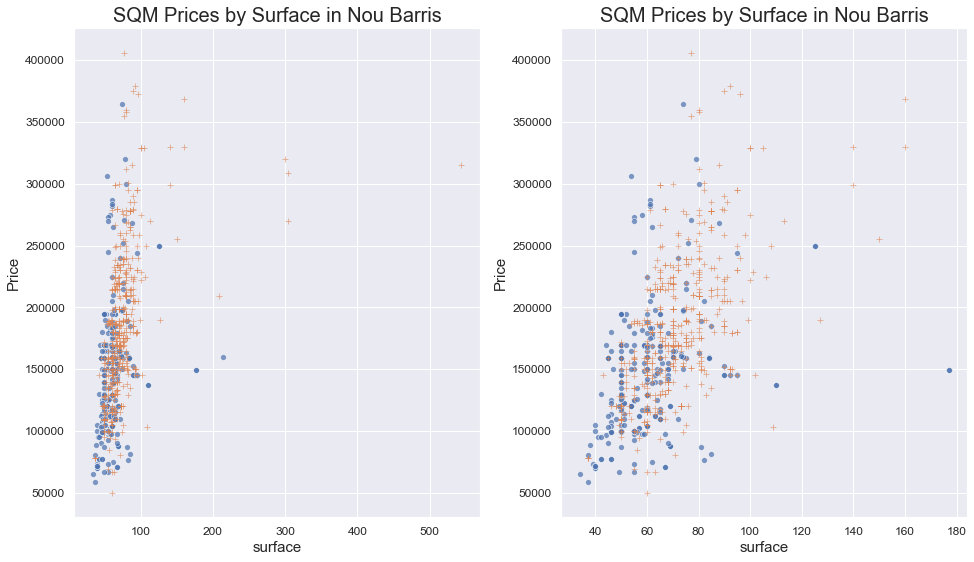

In [172]:
districtes =['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts','Sant Marti',
             'Ciutat Vella','Sants Montjuic','Horta Guinardó', 'Sant Andreu', 'Nou Barris']

for i in districtes:
    plot_scatter_chart(df_prop_3, df_prop_clean, i)
    #plot_scatter_chart(df_prop_clean, i)
    

# 2.PRICES

## 2.1 SALES PRICES

In [173]:
df_distr = df_prop_clean.groupby('district')['price'].agg([('Mean Price','mean'),('Stand. dev.','std'),('Max Price', 'max'),('Min Price', 'min')]).sort_values('Mean Price', ascending=False)
df_distr

Mean Price  Stand. dev.  Max Price  Min Price
district                                                          
Sarria-Sant_Gervasi   740313.05    293360.63 1525000.00   79000.00
Les Corts             550216.77    267498.56 1430000.00   95000.00
Eixample              525966.89    241311.66 1500000.00   75000.00
Gràcia                408876.51    175555.10 1500000.00   90000.00
Ciutat Vella          394225.98    240294.21 1380000.00   40000.00
Sant Marti            368781.27    230630.89 1500000.00   39500.00
Sants Montjuic        300590.71    118488.79  900000.00   69900.00
Horta Guinardó        276890.00    132676.37  980000.00   50000.00
Sant Andreu           264382.87    116511.96  760000.00   51000.00
Nou Barris            176760.74     67888.18  495000.00   39000.00

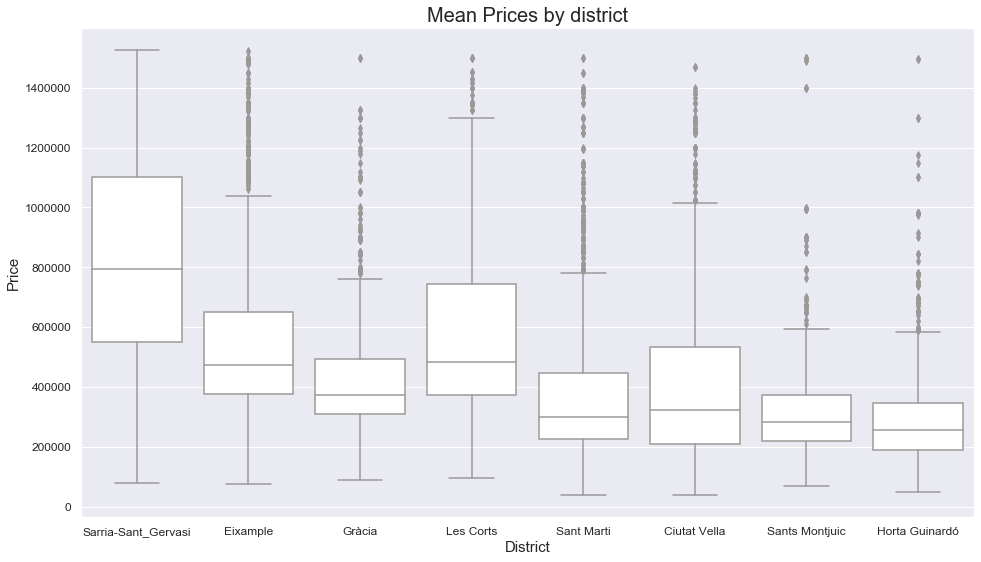

In [174]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.boxplot(x="district", y="price", linewidth=1.5, color='white', data=df_prop_4, order=rank)

ax.axes.set_title("Mean Prices by district",fontsize=20)
ax.set_xlabel("District",fontsize=15)
ax.set_ylabel("Price",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('mean_price.png', dpi=400)

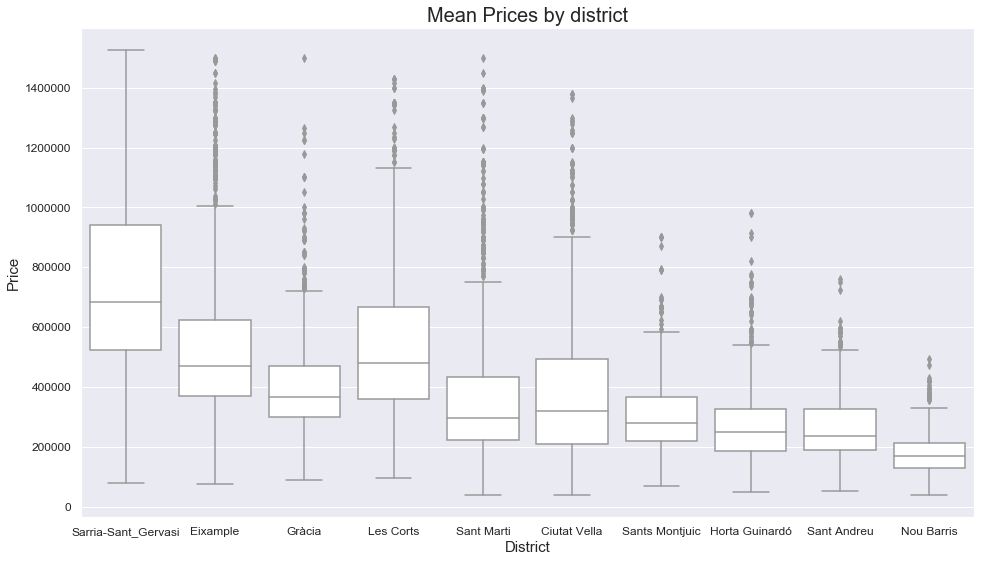

In [175]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.boxplot(x="district", y="price", linewidth=1.5, color='white', data=df_prop_clean, order=districtes)

ax.axes.set_title("Mean Prices by district",fontsize=20)
ax.set_xlabel("District",fontsize=15)
ax.set_ylabel("Price",fontsize=15)
ax.tick_params(labelsize=12)
#ax.figure.savefig('mean_price2.png', dpi=400)

## 2.2 SALES PRICES BY M2

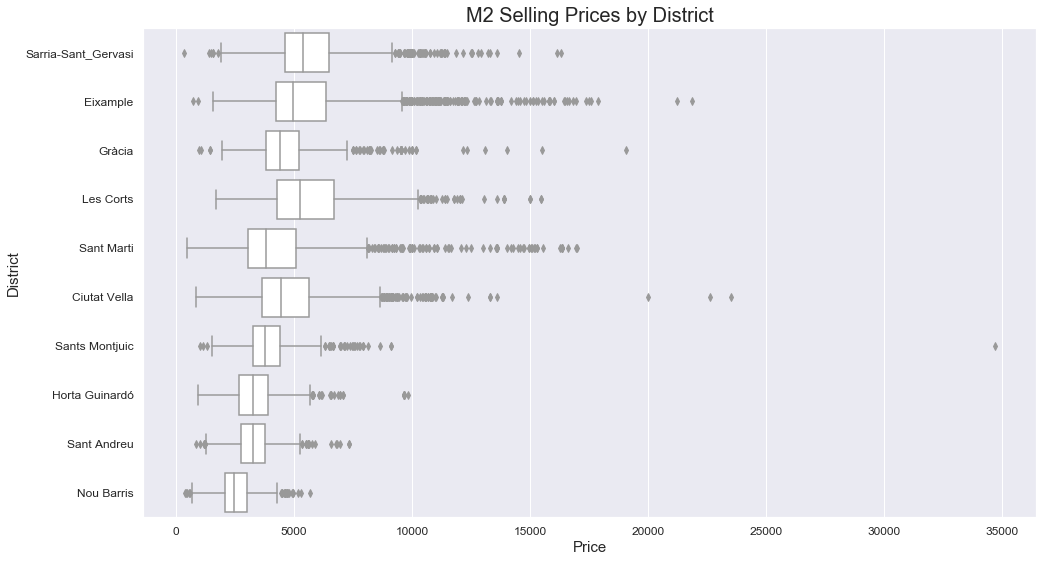

In [176]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.boxplot(x="sqm_price", y="district", linewidth=1.5, color='white', data=df_prop_3,orient="h", order=districtes)

ax.axes.set_title("M2 Selling Prices by District",fontsize=20)
ax.set_xlabel("Price",fontsize=15)
ax.set_ylabel("District",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('m2 by district.png', dpi=400)

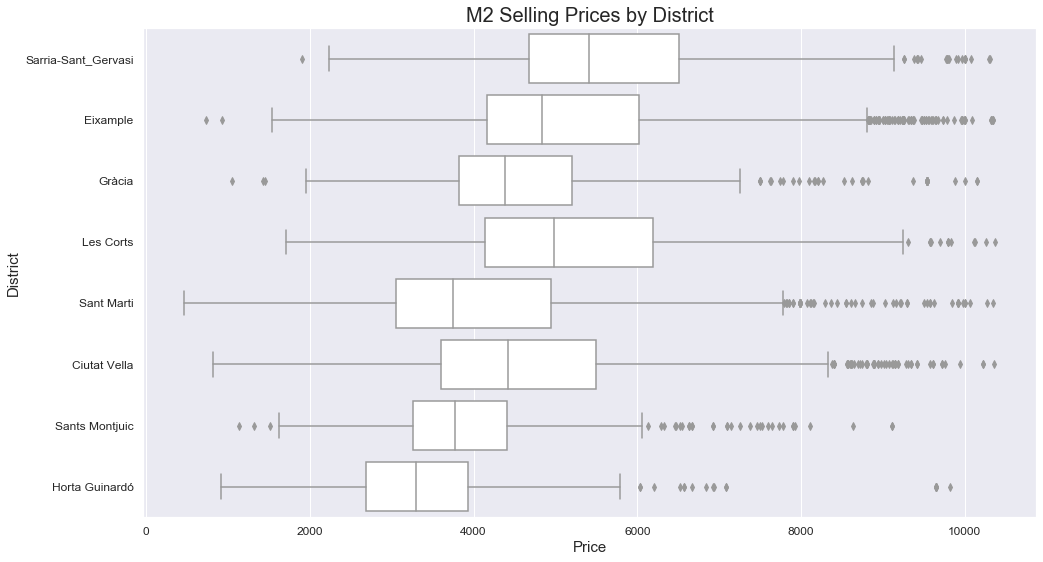

In [177]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.boxplot(x="sqm_price", y="district", linewidth=1.5, color='white', data=df_prop_clean, orient="h", order=rank)

ax.axes.set_title("M2 Selling Prices by District",fontsize=20)
ax.set_xlabel("Price",fontsize=15)
ax.set_ylabel("District",fontsize=15)
ax.tick_params(labelsize=12)

# 2.3SURFACE & SQM PRICE

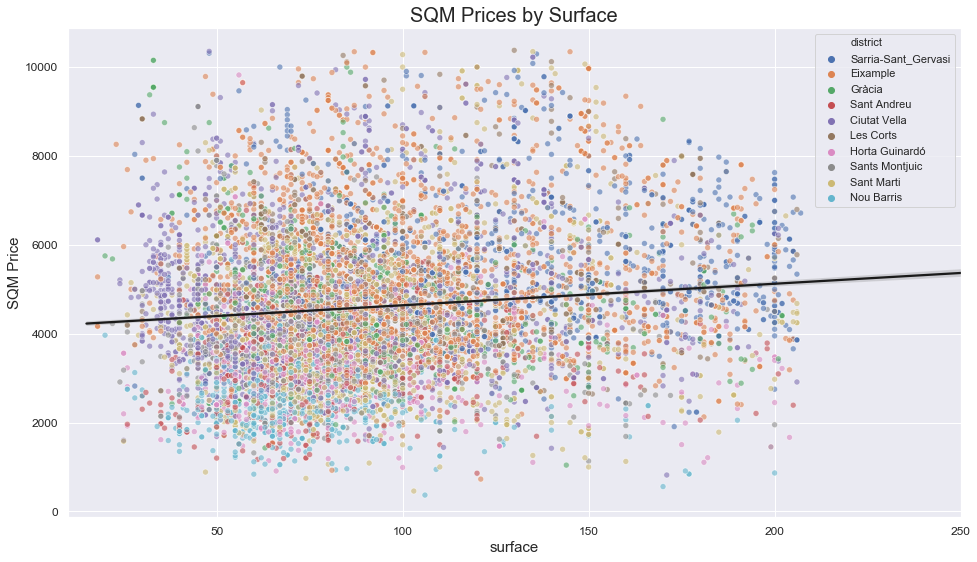

In [201]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.scatterplot(x="sqm_constr", y="sqm_price",hue='district', alpha=0.6, data=df_prop_clean)
ax=sns.regplot('sqm_constr', 'sqm_price', data=df_prop, scatter=False, color=".1")
plt.xlim(10, 250)
#ax = sns.lmplot(x="sqm_constr", y="sqm_price", data=df_prop)
ax.axes.set_title("SQM Prices by Surface",fontsize=20)
ax.set_xlabel("surface",fontsize=15)
ax.set_ylabel("SQM Price",fontsize=15)
ax.tick_params(labelsize=12)
ax.figure.savefig('sqm_price_by_surface.png', dpi=400)

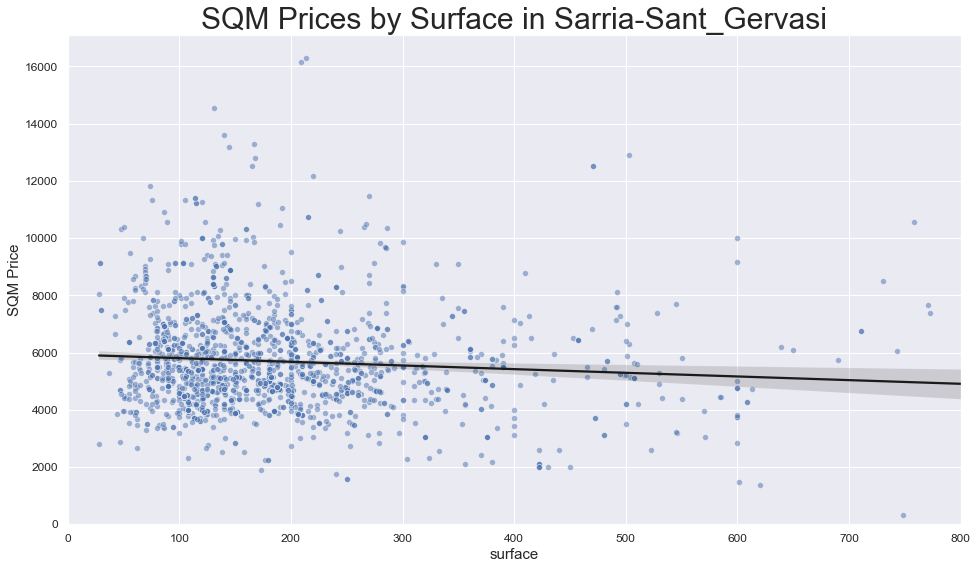

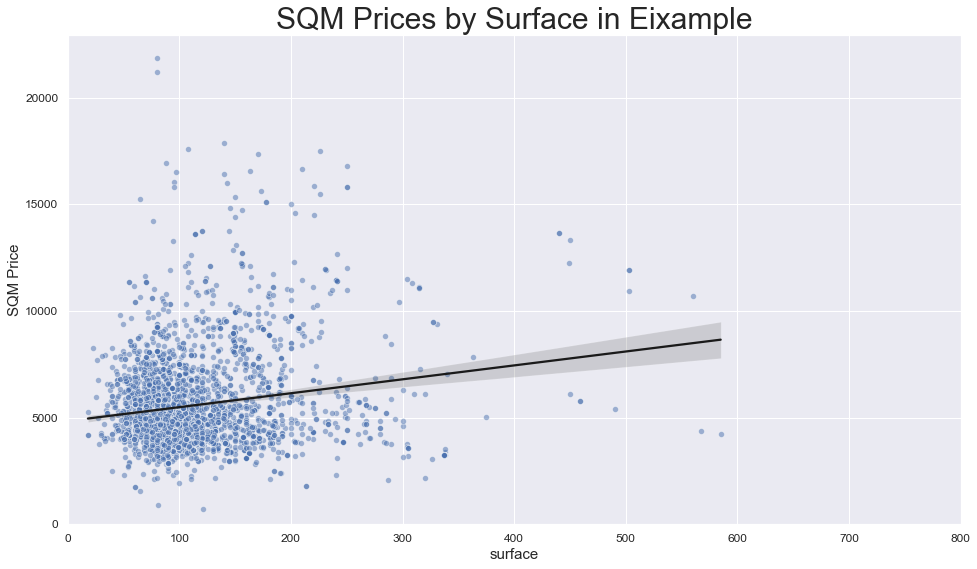

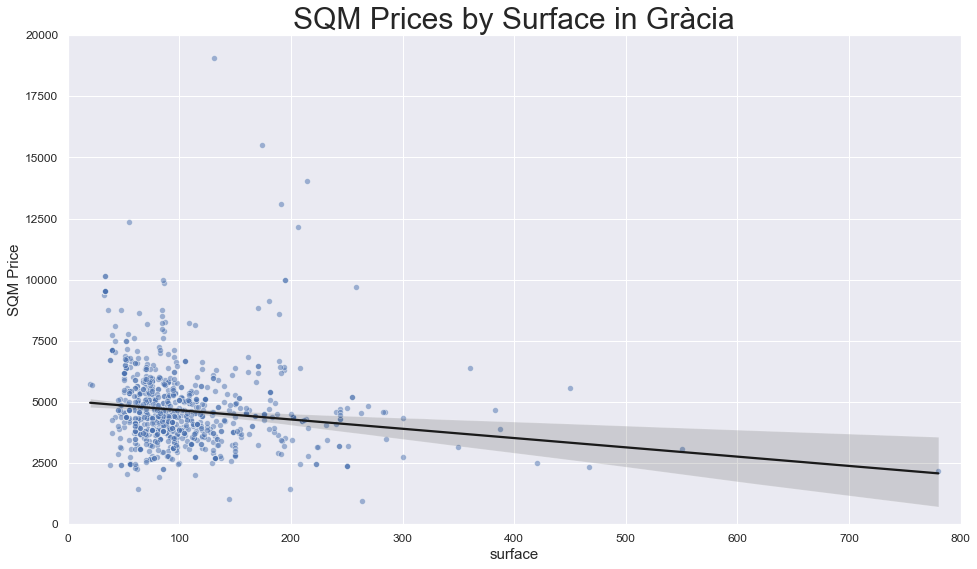

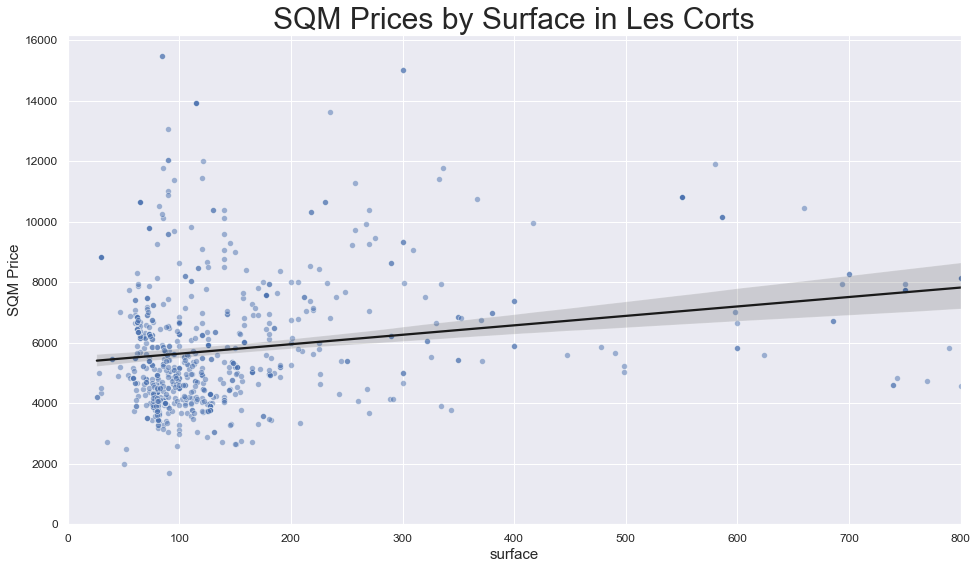

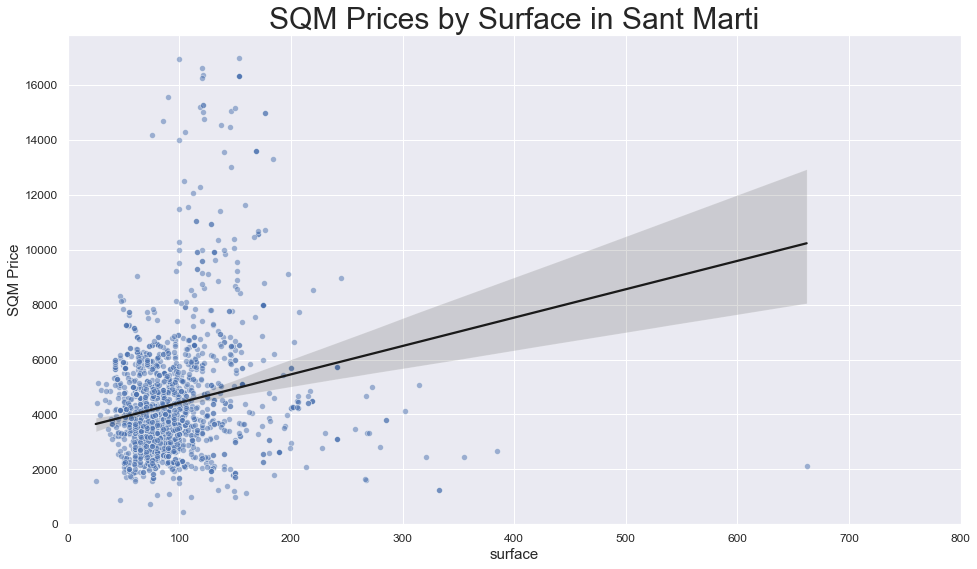

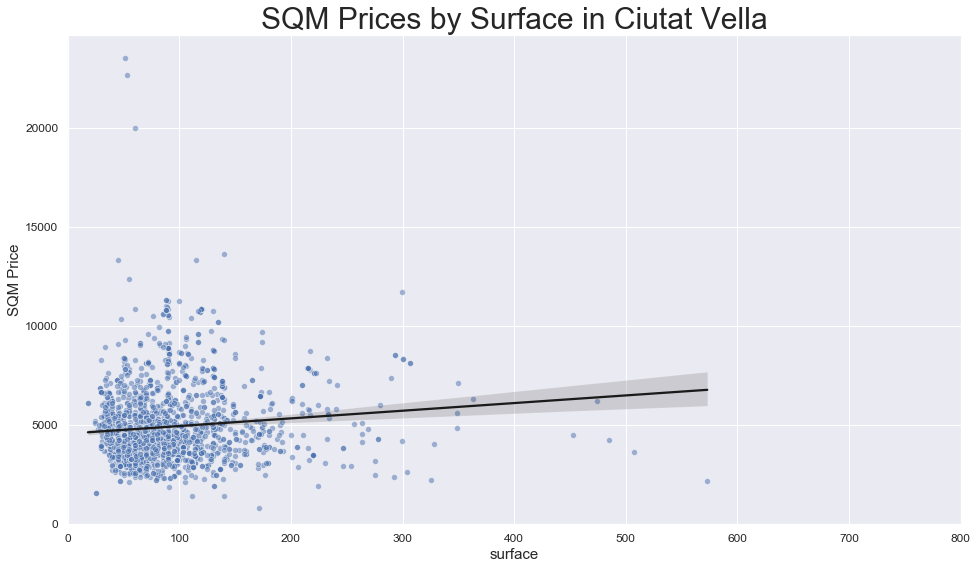

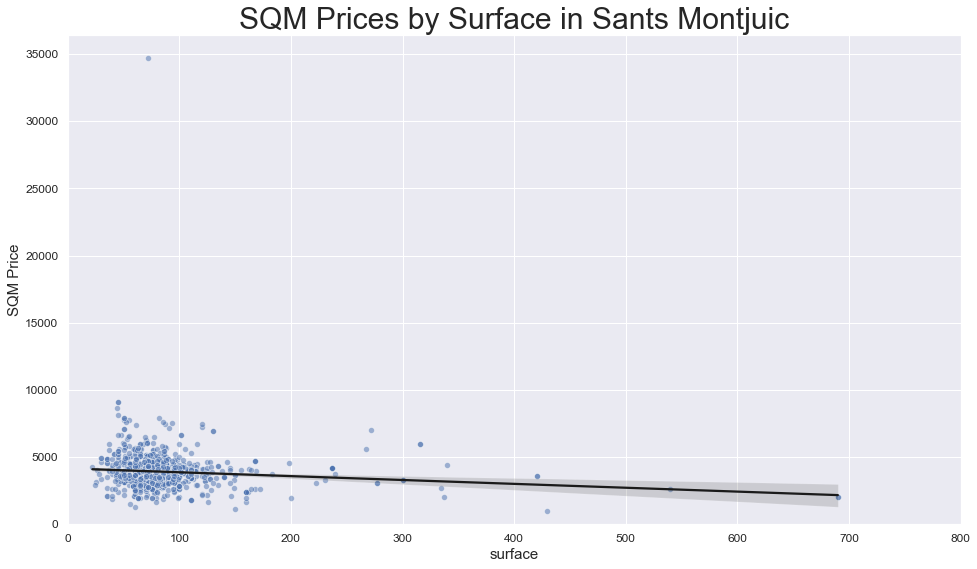

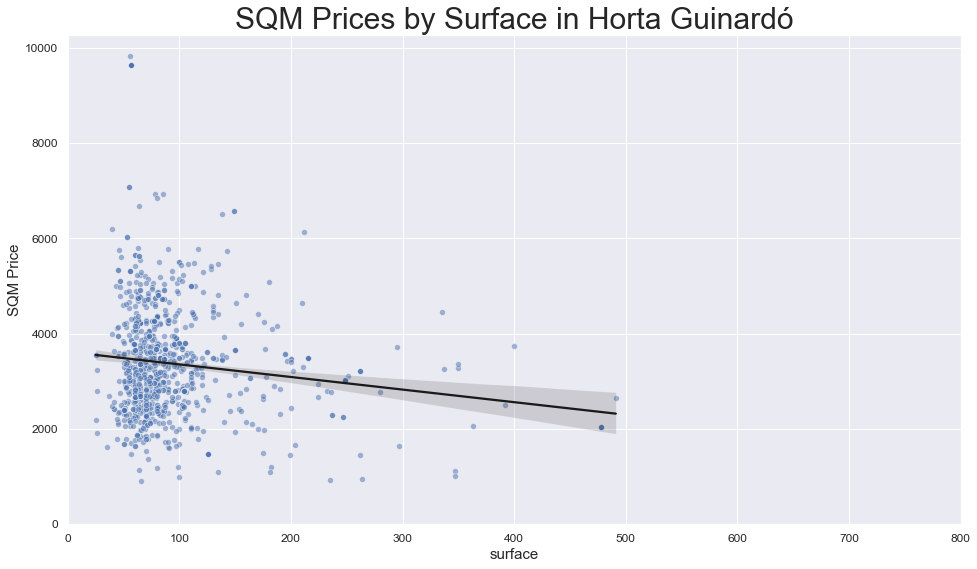

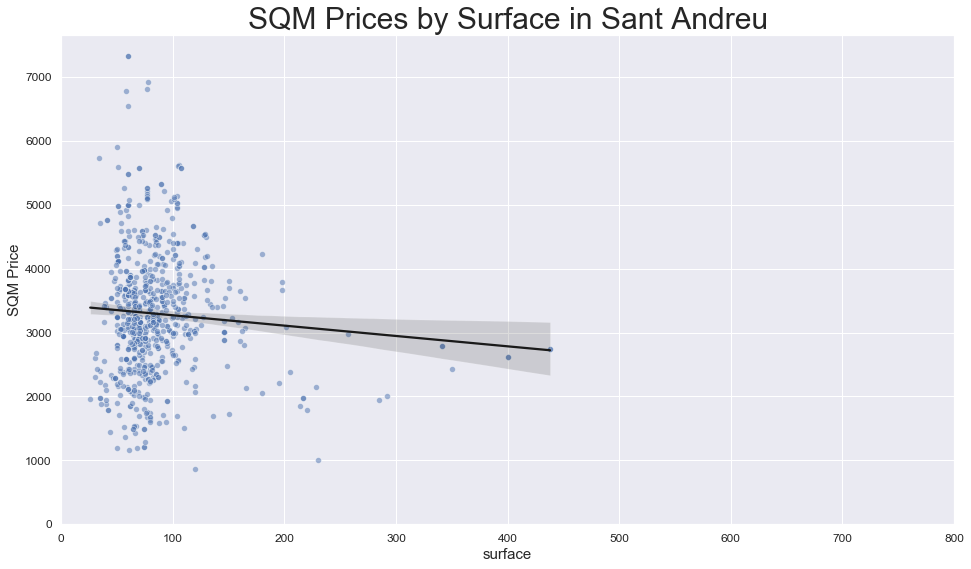

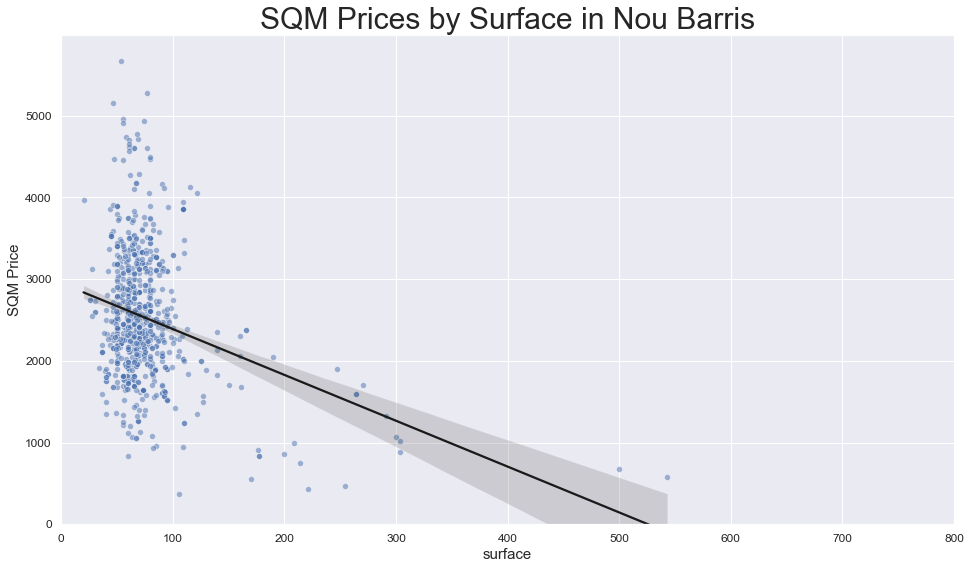

In [179]:
districtes =['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts','Sant Marti',
             'Ciutat Vella','Sants Montjuic','Horta Guinardó', 'Sant Andreu', 'Nou Barris']

for i in districtes:
    #plt.figure(figsize=(12,7))
    #plt.scatter(df.medv, df[i], s=75, c=df["medv"], cmap="BuGn")
    sns.set(style="darkgrid")
    fig, ax = plt.subplots(figsize=(16,9))
    
    df = df_prop_3.loc[df_prop.district== i ]
    
    ax = sns.scatterplot(x="sqm_constr", y="sqm_price", alpha=0.50 , data=df)
    ax = sns.regplot('sqm_constr', 'sqm_price', data=df, scatter=False, color=".1")
    
    ax.axes.set_title(f"SQM Prices by Surface in {i}",fontsize=30)
    ax.set_xlabel("surface",fontsize=15)
    ax.set_ylabel("SQM Price",fontsize=15)
    ax.tick_params(labelsize=12)
    
    ax = plt.ylim(0, None)
    ax = plt.xlim(0, 800)
    plt.savefig(f"SQM Prices by Surface in {i}.png", dpi=400)

    
    
    
  

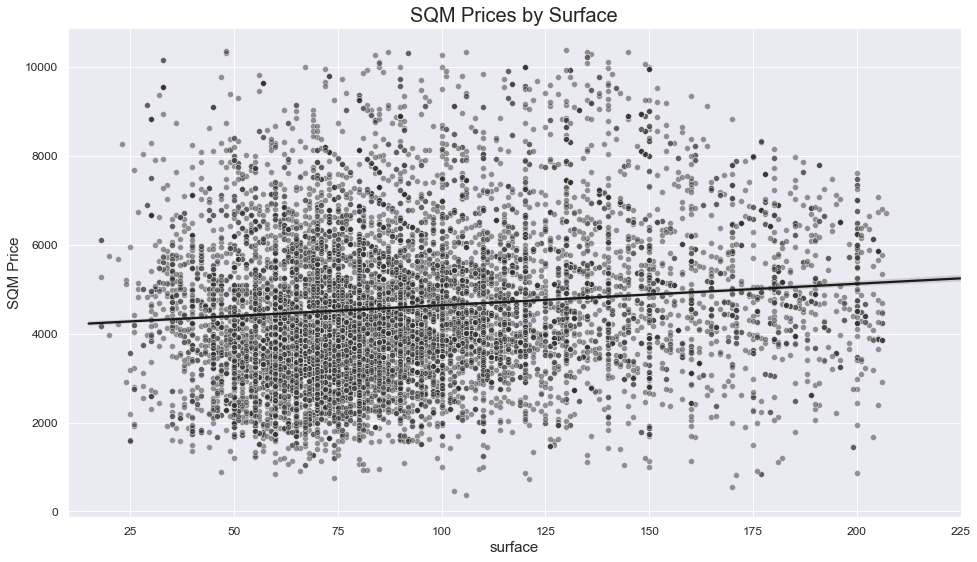

In [205]:
sns.set(style="darkgrid")
fig, ax = plt.subplots(figsize=(16,9))
ax = sns.scatterplot(x="sqm_constr", y="sqm_price",color=".2", alpha=0.5, data=df_prop_clean)
plt.xlim(10,225)
ax=sns.regplot('sqm_constr', 'sqm_price', data=df_prop, scatter=False, color=".1")
#ax = sns.lmplot(x="sqm_constr", y="sqm_price", data=df_prop)
ax.axes.set_title("SQM Prices by Surface",fontsize=20)
ax.set_xlabel("surface",fontsize=15)
ax.set_ylabel("SQM Price",fontsize=15)
ax.tick_params(labelsize=12)


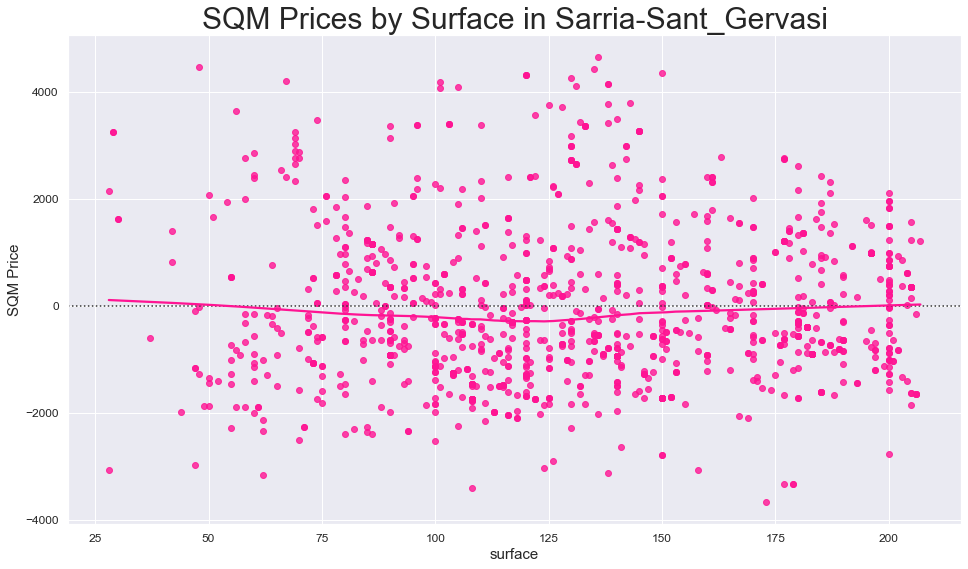

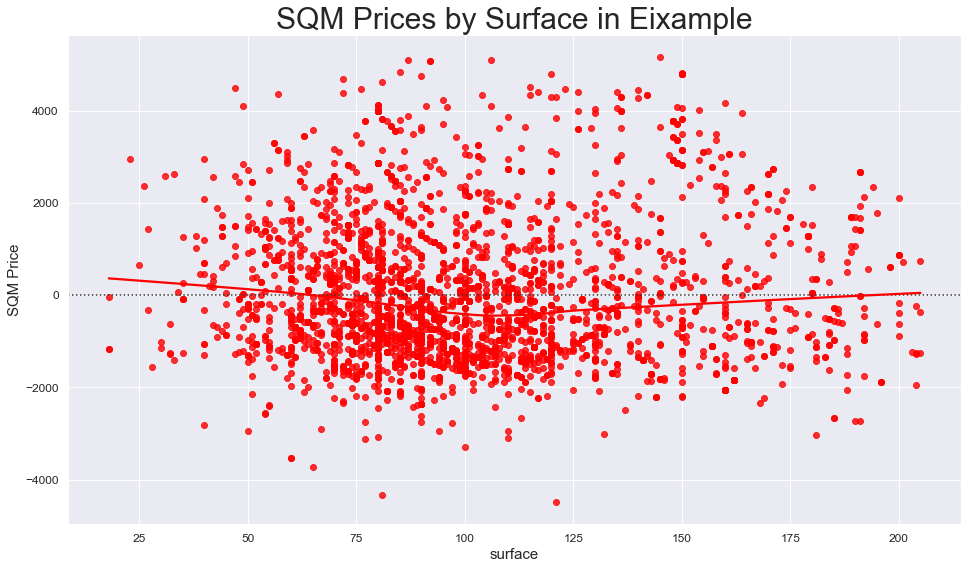

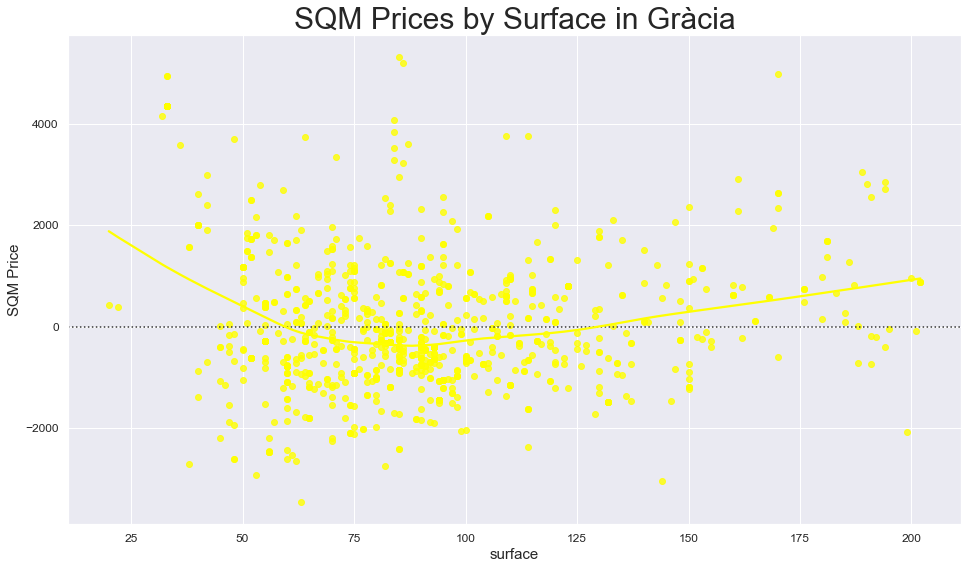

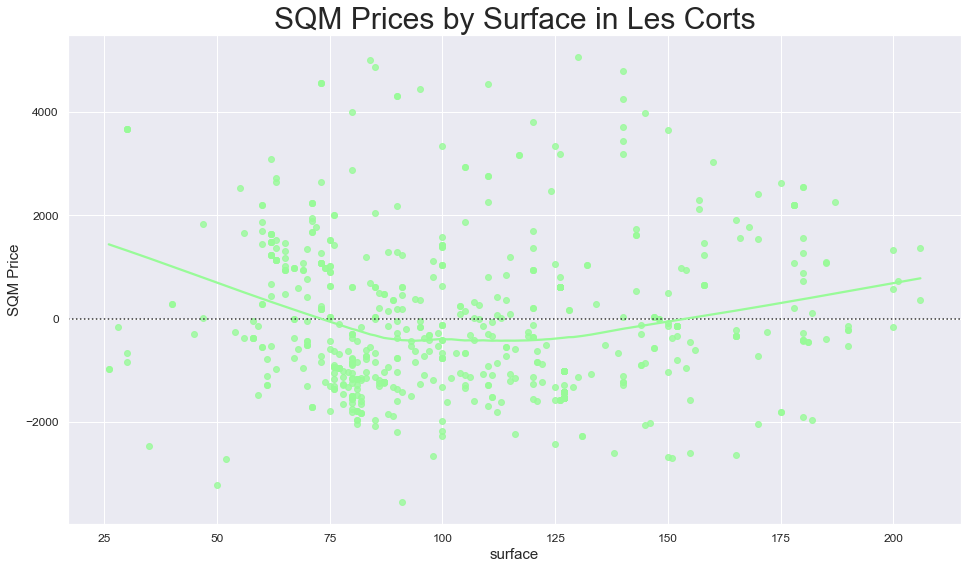

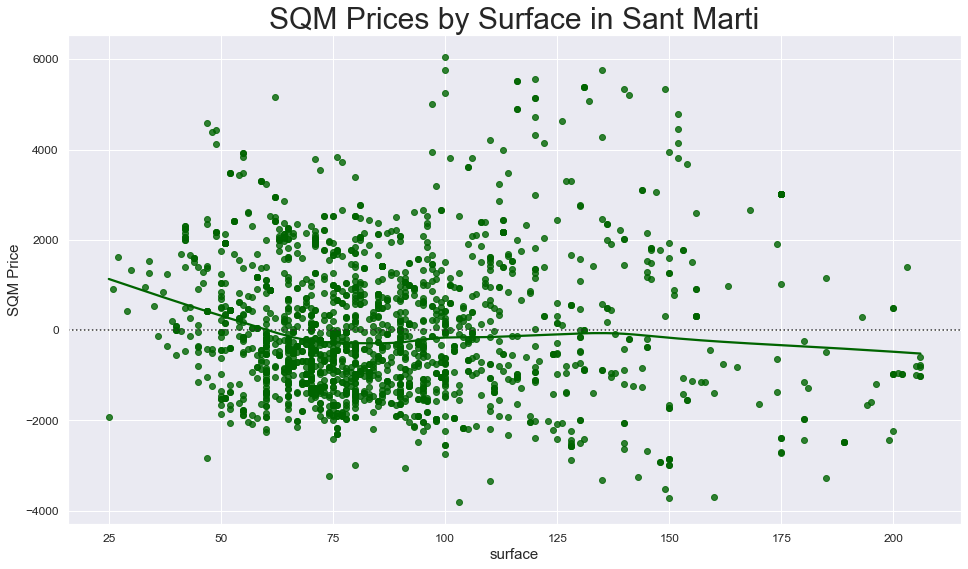

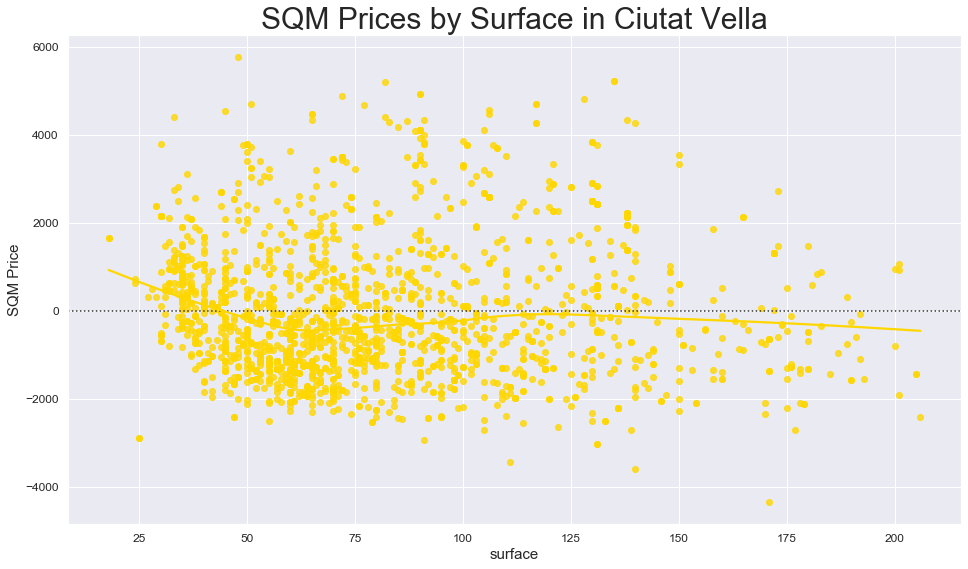

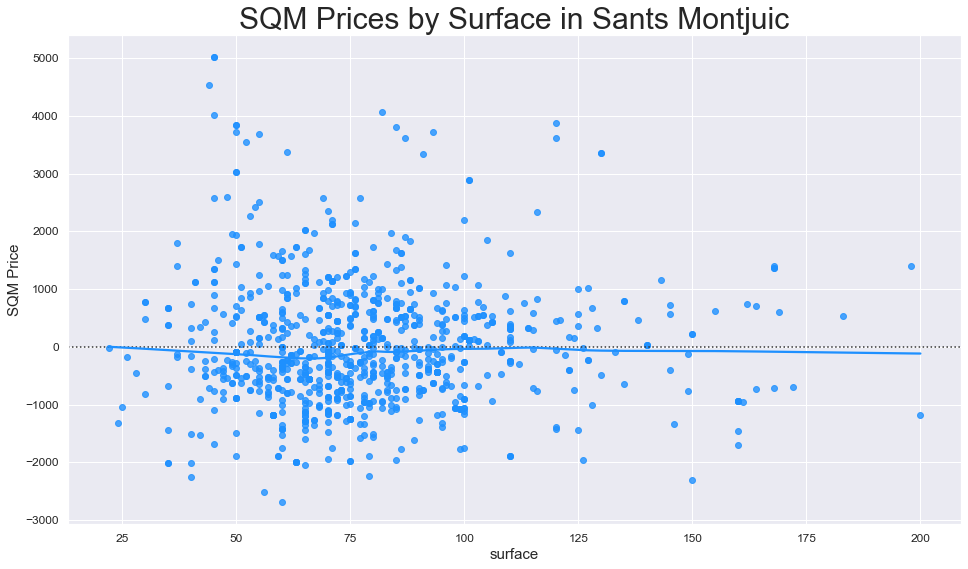

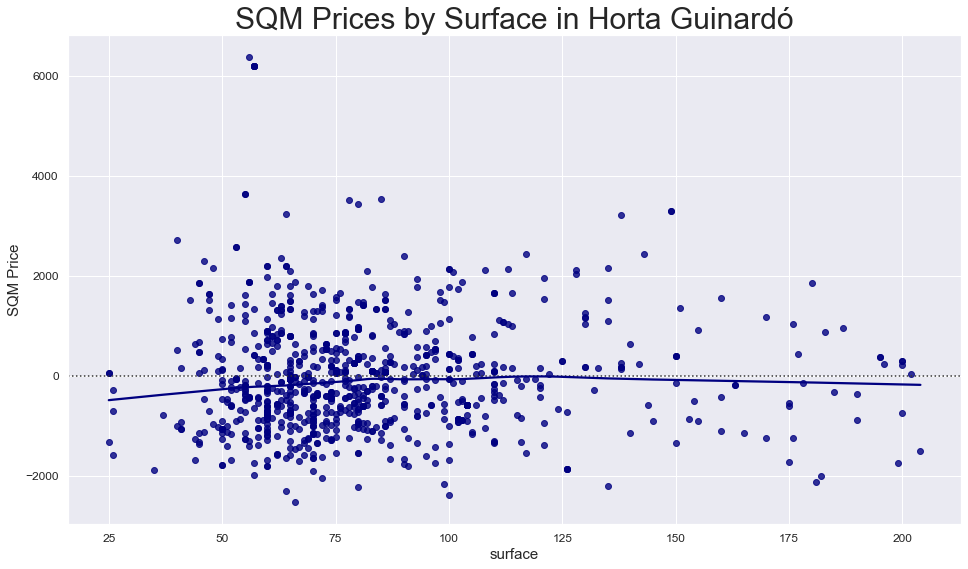

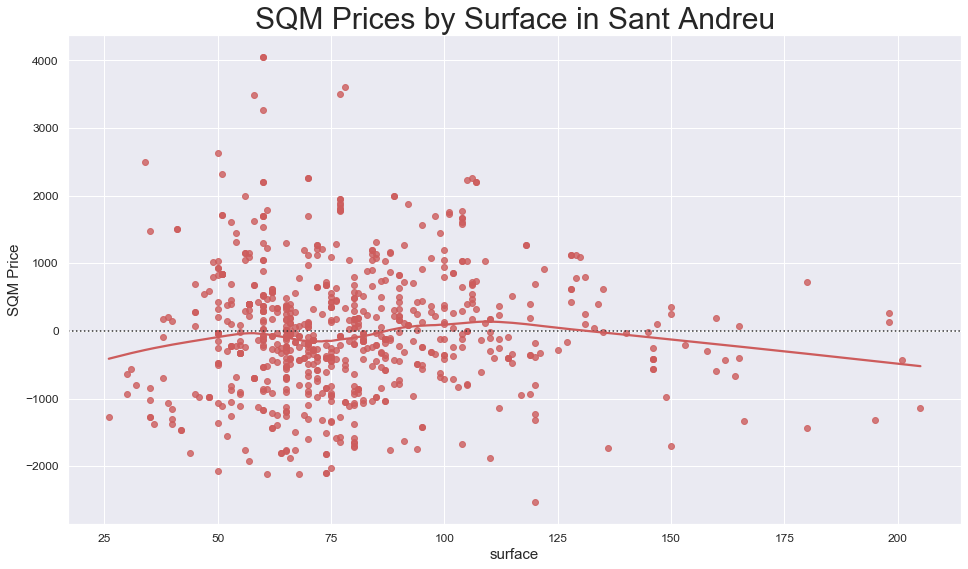

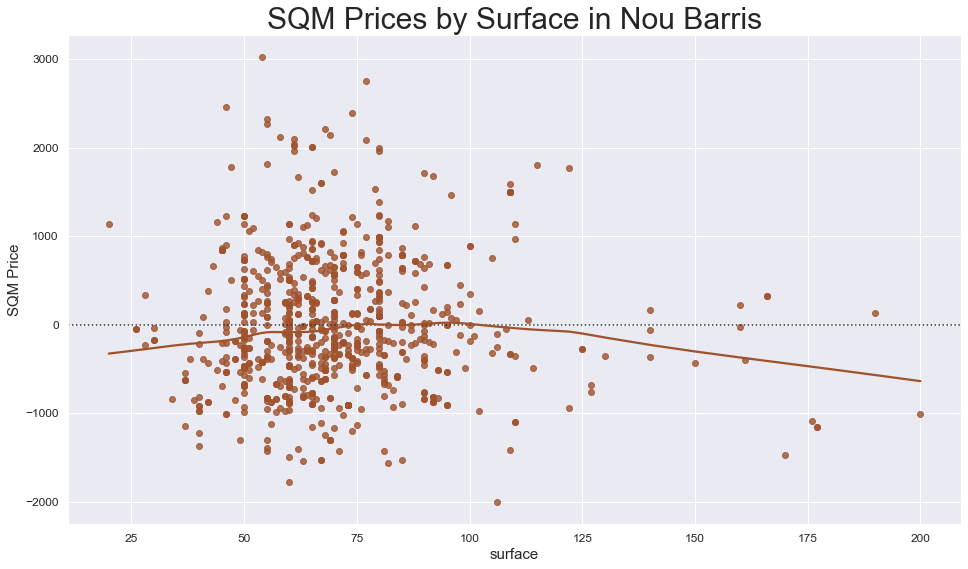

In [181]:
districtes =['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts','Sant Marti',
             'Ciutat Vella','Sants Montjuic','Horta Guinardó', 'Sant Andreu', 'Nou Barris']
colors = ['deeppink', 'red', 'yellow', 'palegreen', 'darkgreen','gold','dodgerblue','navy', 'indianred', 'sienna']


for i, j in zip(districtes, colors):
    df_distr=df_prop_clean.loc[df_prop_clean.district == i]
    fig, ax = plt.subplots(figsize=(16,9))
    ax = sns.residplot('sqm_constr','sqm_price',data=df_distr, lowess=True, color=j)

    ax.axes.set_title(f"SQM Prices by Surface in {i}",fontsize=30)
    ax.set_xlabel("surface",fontsize=15)
    ax.set_ylabel("SQM Price",fontsize=15)
    ax.tick_params(labelsize=12)
    plt.savefig(f"regression SQM Prices by Surface  in {i}.png", dpi=400)

## 2.3 PRICES DISTRIBUTION

No handles with labels found to put in legend.


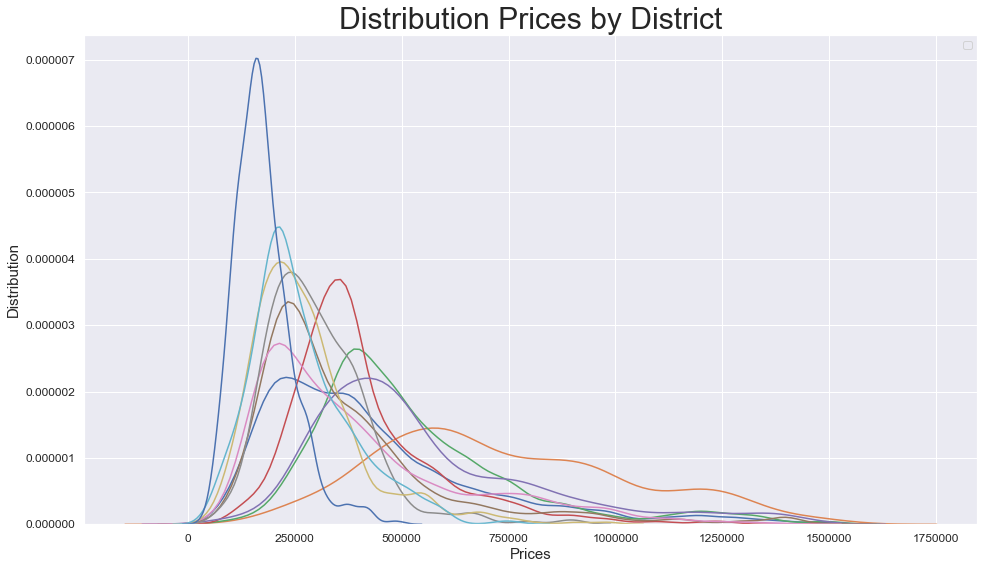

In [182]:
districtes =['Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts','Sant Marti',
             'Ciutat Vella','Sants Montjuic','Horta Guinardó', 'Sant Andreu', 'Nou Barris']

colors = ['deeppink', 'red', 'yellow', 'palegreen', 'darkgreen','gold','dodgerblue','navy', 'indianred', 'sienna']
labels = ['General','Sarria-Sant_Gervasi','Eixample','Gràcia','Les Corts',
        'Sant Marti','Ciutat Vella','Sants Montjuic','Horta Guinardó', 'Sant Andreu', 'Nou Barris']

x = df_prop_clean['price']
x1, x2, x3, x4, x5, x6, x7, x8, x9, x10 = [df_prop_clean.loc[df_prop_clean.district == i]['price'] for i in districtes]

fig, ax = plt.subplots(figsize=(16,9))
ax = sns.distplot(x, rug=False, hist=False)
ax = sns.distplot(x1, rug=False, hist=False)
ax = sns.distplot(x2, rug=False, hist=False)
ax = sns.distplot(x3, rug=False, hist=False)
ax = sns.distplot(x4, rug=False, hist=False)
ax = sns.distplot(x5, rug=False, hist=False)
ax = sns.distplot(x6, rug=False, hist=False)
ax = sns.distplot(x7, rug=False, hist=False)
ax = sns.distplot(x8, rug=False, hist=False)
ax = sns.distplot(x9, rug=False, hist=False)
ax = sns.distplot(x10, rug=False, hist=False)

ax.axes.set_title("Distribution Prices by District",fontsize=30)
ax.set_xlabel("Prices",fontsize=15)
ax.set_ylabel("Distribution",fontsize=15)
ax.set_label(labels)
ax.legend()
ax.tick_params(labelsize=12)
plt.savefig(f"distribution_prices_by_district.png", dpi=400)

In [36]:
#v0, v1, v2 = [i**2 for i in range(3)]
x1, x2, x3, x4, x5, x6, x7, x8 = [df_prop.loc[df_prop.district == i]['price'] for i in rank]

## 2.4 3d GRAPH

In [33]:
dict_names = {'Sarria-Sant_Gervasi':'05','Eixample':'02','Gràcia':'06',
              'Les Corts':'04', 'Sant Marti':'10','Ciutat Vella':'01',
              'Sants Montjuic':'03','Horta Guinardó':'07'}

def get_distr(neigh): 
    for key, value in dict_names.items():
        if neigh == key:
            return value 

In [34]:
df_prop['codi_barri'] = df_prop.district.apply(lambda x: get_distr(x))

In [35]:
df_3d = df_prop.dropna()
df_3d.columns

Index(['Unnamed: 0', 'district', 'room_n', 'bath_n', 'sqm_constr', 'price',
       'sqm_price', 'codi_barri'],
      dtype='object')

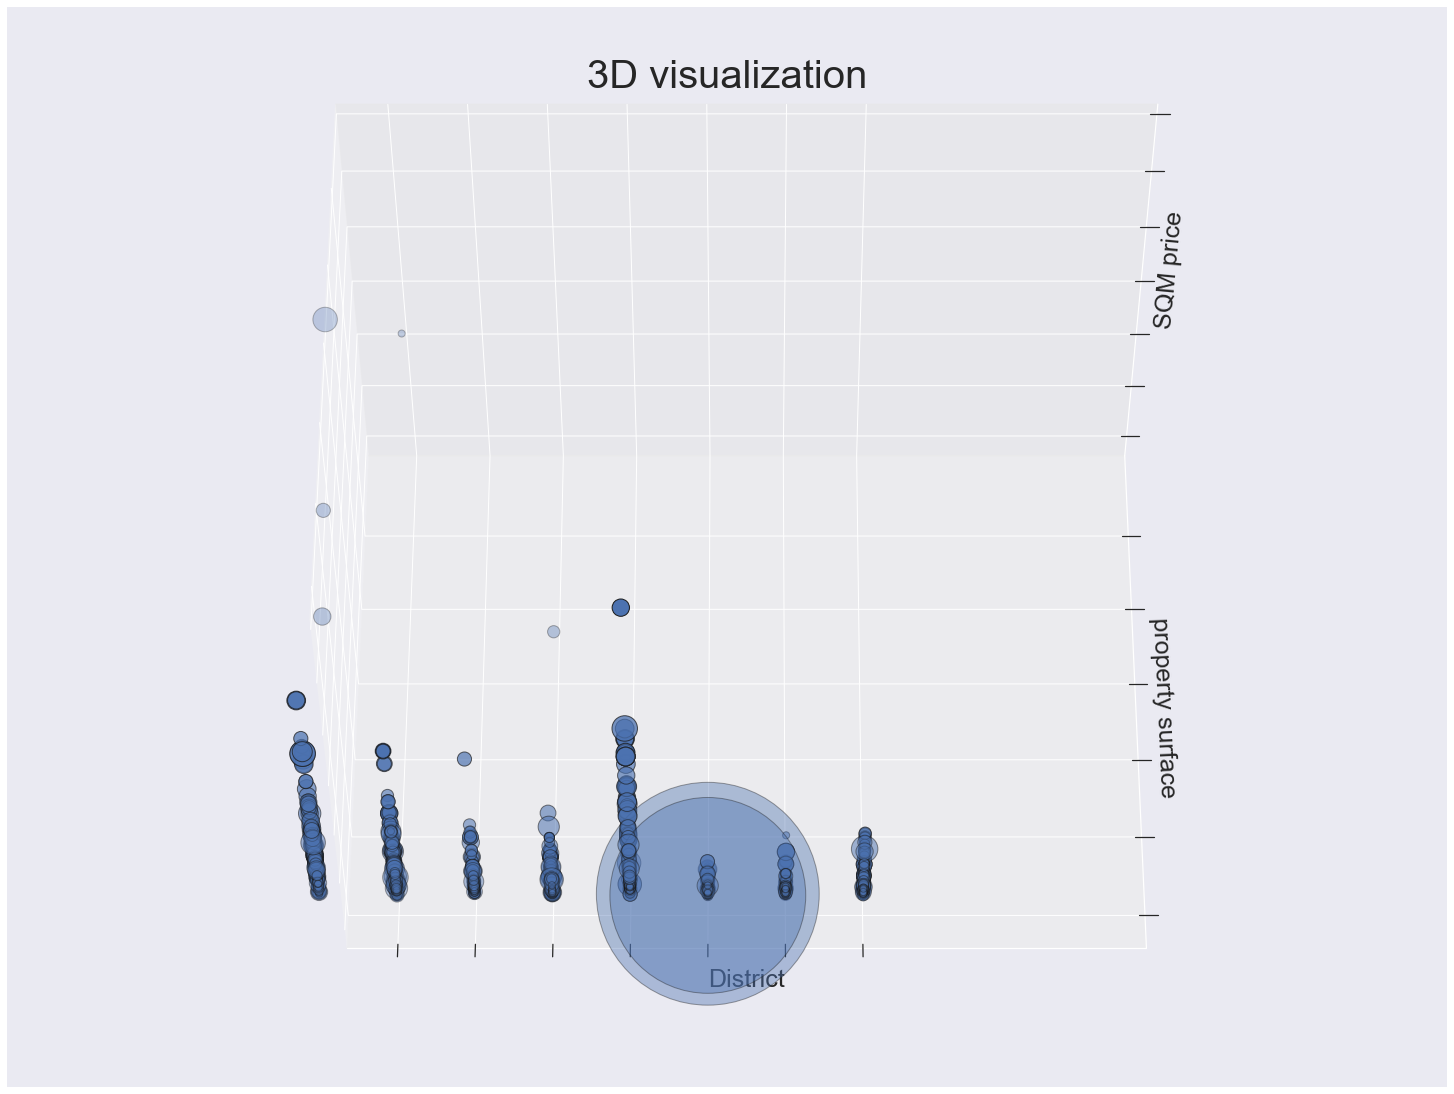

In [36]:
colors = ['deeppink', 'red', 'yellow', 'palegreen', 'darkgreen','gold','dodgerblue','navy']
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure(1, figsize=(20, 15))
ax = Axes3D(fig, elev=56, azim=-90)
ax.scatter(df_3d.iloc[:, 7], df_3d.iloc[:, 6], df_3d.iloc[:, 5],
           cmap=plt.cm.Set1, edgecolor='k', s = df_3d.iloc[:, 3]*50)

"""for name, label in [('Virginica', 0), ('Setosa', 1), ('Versicolour', 2)]:
    ax.text3D(features[features['Species']== label][features.columns[0]].mean(),
              features[features['Species'] == label][features.columns[1]].mean(),
              features[features['Species'] == label][features.columns[2]].mean(),
              name,
              horizontalalignment='center',
              bbox=dict(alpha=.5, edgecolor='w', facecolor='w'),size=25)"""

ax.set_title("3D visualization", fontsize=40)
ax.set_xlabel("District", fontsize=25)
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("property surface", fontsize=25)
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("SQM price", fontsize=25)
ax.w_zaxis.set_ticklabels([])

plt.show()

In [ ]:
df_prop.columns

## 3.GEOGRAPHIC VISUAIZATION

In [183]:
import geojson
import folium

In [184]:
with open(r'C:\Users\Migue Granica\Desktop\IronHack\Module_3\PROJECT_5\bcn-geodata\districtes\districtes.geojson') as f:
    geojs = geojson.load(f)

In [185]:
df_distr = df_prop_clean.groupby('district')['sqm_price'].agg([('Mean Price','mean'),('Stand. dev.','std')]).sort_values('Mean Price', ascending=False)


In [186]:
dict_names = {'Sarria-Sant_Gervasi':'05','Eixample':'02','Gràcia':'06',
              'Les Corts':'04', 'Sant Marti':'10','Ciutat Vella':'01',
              'Sants Montjuic':'03','Horta Guinardó':'07', 'Sant Andreu':'08',
              'Nou Barris':'09'}

def get_distr(neigh): 
    for key, value in dict_names.items():
        if neigh == key:
            return value 

In [187]:
df_distr.reset_index(inplace=True)

In [188]:
df_distr['codi_barri'] = df_distr.district.apply(lambda x: get_distr(x))

In [189]:
pd.options.display.float_format = '{:.2f}'.format
df_distr.loc[df_distr['district']!='none']

district  Mean Price  Stand. dev. codi_barri
0  Sarria-Sant_Gervasi     5659.19      1431.43         05
1            Les Corts     5275.81      1495.17         04
2             Eixample     5235.41      1494.08         02
3         Ciutat Vella     4745.75      1544.81         01
4               Gràcia     4619.56      1371.46         06
5           Sant Marti     4112.84      1541.67         10
6       Sants Montjuic     3890.18      1066.52         03
7       Horta Guinardó     3405.57      1140.87         07
8          Sant Andreu     3318.56       930.59         08
9           Nou Barris     2561.71       744.31         09

In [190]:
m = folium.Map(location=[41.3902, 2.1540], 
               zoom_start=12,
               tiles='Stamen Terrain')
               
m.choropleth(
    geo_data=geojs,
    name='choropleth',
    data=df_distr,
    columns=['codi_barri','Mean Price'],
    key_on="properties.DISTRICTE",
    fill_color='BuPu',
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name=' SQM price by district'
)
folium.LayerControl().add_to(m)
m.save('mean_price_by_district.html')
               
#m.save('acc_by_districte.html')

c:\program files\python38\lib\site-packages\folium\folium.py:411: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  warnings.warn(


In [191]:
m